**Created on:** Apr 10 2025, 00:25:57  
**Author:** Amoy Ashesh

# Imports

In [278]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
from astroquery.gaia import Gaia
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from tqdm import tqdm
from tqdm.keras import TqdmCallback
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import joblib
import pickle

In [2]:
pd.set_option("display.max_columns", None)

# Export deviations (Chae)

delta_dt == Difference between actual and Newtonian datasets </br>
dev_dt == Deviations dataset

## Load data

In [3]:
chae_dt = pd.read_csv("Chae//gaia_dr3_MSMS_d200pc.csv")
n_chae_dt = pd.read_csv("Chae//Newton_dr3_MSMS_d200pc_1.csv")

## EDA

In [4]:
chae_dt.head()

,source_id1,source_id2,R_chance,s[kau],d1[pc],d1_err[pc],d2[pc],d2_err[pc],MagG1,MagG2,M1[Msun],M2[Msun],mu1ra[mas/yr],mu1ra_err[mas/yr],mu1dec[mas/yr],mu1dec_err[mas/yr],mu2ra[mas/yr],mu2ra_err[mas/yr],mu2dec[mas/yr],mu2dec_err[mas/yr],RV1[km/s],RV1_err[km/s],RV2[km/s],RV2_err[km/s],gal_b[deg],ruwe1,ruwe2,bp_rp1,bp_rp2,RA1[deg],DEC1[deg],RA2[deg],DEC2[deg],e,e0,e1,A_G_A[mag],A_G_B[mag]
0,4282728430212942464,4282728430212941568,0.000016,0.845933,111.639048,0.198398,110.650376,0.307015,8.400168,9.472393,0.537816,0.410817,-71.485170,0.024708,-27.848576,0.018109,-73.304429,0.037090,-27.249818,0.027461,4.934633,2.232112,-14.918956,6.131511,2.456119,1.123015,0.963453,1.805582,2.272741,283.193084,6.061580,283.195097,6.060929,0.99,0.722030,1.000000,0.000000,0.000000
1,4281804428128555904,4281804290684934656,0.498612,18.084577,199.976676,0.883724,221.282215,40.868129,8.010069,13.672469,0.584834,0.107193,46.613763,0.024801,-25.438740,0.021018,47.324671,0.923248,-25.649966,0.754350,-10.625394,2.979278,-20000.000000,10.000000,1.907666,1.466438,1.578903,1.877460,2.759157,282.647465,3.790959,282.630647,3.772266,0.94,0.589921,1.000000,0.197264,1.151941
2,4282348823828735488,4282348823824657920,0.000133,0.956450,179.778837,0.677210,167.882526,7.459691,2.308824,12.248357,1.646754,0.165174,14.474237,0.020226,-28.907226,0.020600,14.942550,0.414766,-28.464626,0.276057,-21.112366,2.484129,-20000.000000,10.000000,3.012828,1.017610,1.015916,0.418920,0.822925,282.379293,5.699166,282.377904,5.698644,0.99,0.644175,1.000000,0.000000,0.000000
3,4282207536595623296,4282207536595623808,0.000001,0.282474,153.915106,0.555936,154.062080,0.591904,7.781936,7.794307,0.612276,0.610790,12.443890,0.023334,16.264184,0.022216,14.497978,0.024854,17.318086,0.023709,-10000.000000,2.761939,-20000.000000,2.534091,3.387217,0.899959,0.948609,1.860158,1.833619,281.629990,5.058593,281.629997,5.059103,0.50,0.393092,0.860745,0.005687,0.005901
4,4282806804774827136,4282806804771089280,0.000025,0.191478,154.559818,2.291218,158.329900,2.021551,10.593326,10.595987,0.291688,0.291432,12.451993,0.090818,-18.871693,0.082891,11.253573,0.073520,-19.304239,0.069624,-10000.000000,10.000000,-20000.000000,10.000000,1.954179,1.073008,0.937339,2.603960,2.575692,283.888252,6.311214,283.888366,6.311539,0.70,0.457176,0.921035,0.000000,0.000000


In [5]:
n_chae_dt.head()

,source_id1,source_id2,R_chance,s[kau],d1[pc],d1_err[pc],d2[pc],d2_err[pc],MagG1,MagG2,M1[Msun],M2[Msun],mu1ra[mas/yr],mu1ra_err[mas/yr],mu1dec[mas/yr],mu1dec_err[mas/yr],mu2ra[mas/yr],mu2ra_err[mas/yr],mu2dec[mas/yr],mu2dec_err[mas/yr],RV1[km/s],RV1_err[km/s],RV2[km/s],RV2_err[km/s],gal_b[deg],ruwe1,ruwe2,bp_rp1,bp_rp2,RA1[deg],DEC1[deg],RA2[deg],DEC2[deg],e,e0,e1,A_G1[mag],A_G2[mag]
0,4282728430212942464,4282728430212941568,0.000016,0.845933,111.347048,0.198398,111.348795,0.307015,8.400168,9.472393,0.537816,0.410817,-72.249319,0.024708,-27.451638,0.018109,-72.585251,0.037090,-27.676913,0.027461,4.934633,2.232112,-14.918956,6.131511,2.456119,1.123015,0.963453,1.805582,2.272741,283.193084,6.061580,283.195097,6.060929,0.99,0.722030,1.000000,0.0,0.0
1,4281804428128555904,4281804290684934656,0.498612,18.084577,199.983531,0.883724,199.996544,40.868129,8.010069,13.672469,0.584834,0.183074,46.970913,0.024801,-25.538710,0.021018,47.184851,0.923248,-25.649790,0.754350,-10.625394,2.979278,-20000.000000,10.000000,1.907666,1.466438,1.578903,1.877460,2.759157,282.647465,3.790959,282.630647,3.772266,0.94,0.589921,1.000000,0.0,0.0
2,4282348823828735488,4282348823824657920,0.000133,0.956450,179.681678,0.677210,179.680219,7.459691,2.308824,12.248357,2.755147,0.165174,14.678293,0.020226,-28.689316,0.020600,15.210486,0.414766,-28.629372,0.276057,-21.112366,2.484129,-20000.000000,10.000000,3.012828,1.017610,1.015916,0.418920,0.822925,282.379293,5.699166,282.377904,5.698644,0.99,0.644175,1.000000,0.0,0.0
3,4282207536595623296,4282207536595623808,0.000001,0.282474,153.983973,0.555936,153.984003,0.591904,7.781936,7.794307,0.612276,1.040073,13.505623,0.023334,17.549589,0.022216,13.450513,0.024854,16.344645,0.023709,-10000.000000,2.761939,-20000.000000,2.534091,3.387217,0.899959,0.948609,1.860158,1.833619,281.629990,5.058593,281.629997,5.059103,0.50,0.393092,0.860745,0.0,0.0
4,4282806804774827136,4282806804771089280,0.000025,0.191478,156.679566,2.291218,156.679784,2.021551,10.593326,10.595987,0.291688,0.291432,12.304104,0.090818,-18.548379,0.082891,11.401067,0.073520,-19.628025,0.069624,-10000.000000,10.000000,-20000.000000,10.000000,1.954179,1.073008,0.937339,2.603960,2.575692,283.888252,6.311214,283.888366,6.311539,0.70,0.457176,0.921035,0.0,0.0


In [6]:
len(chae_dt), len(n_chae_dt)

(81880, 81088)

In [7]:
chae_dt['source_id1'].isin(n_chae_dt['source_id1']).sum(), len(chae_dt) - len(n_chae_dt)

(81088, 792)

In [8]:
chae_dt =  chae_dt[chae_dt['source_id1'].isin(n_chae_dt['source_id1'])]

In [9]:
chae_dt['source_id1'].isin(n_chae_dt['source_id1']).sum(), len(chae_dt) - len(n_chae_dt)

(81088, 0)

In [10]:
chae_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81088 entries, 0 to 81879
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_id1          81088 non-null  int64  
 1   source_id2          81088 non-null  int64  
 2   R_chance            81088 non-null  float64
 3   s[kau]              81088 non-null  float64
 4   d1[pc]              81088 non-null  float64
 5   d1_err[pc]          81088 non-null  float64
 6   d2[pc]              81088 non-null  float64
 7   d2_err[pc]          81088 non-null  float64
 8   MagG1               81088 non-null  float64
 9   MagG2               81088 non-null  float64
 10  M1[Msun]            81088 non-null  float64
 11  M2[Msun]            81088 non-null  float64
 12  mu1ra[mas/yr]       81088 non-null  float64
 13  mu1ra_err[mas/yr]   81088 non-null  float64
 14  mu1dec[mas/yr]      81088 non-null  float64
 15  mu1dec_err[mas/yr]  81088 non-null  float64
 16  mu2r

In [11]:
n_chae_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81088 entries, 0 to 81087
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_id1          81088 non-null  int64  
 1   source_id2          81088 non-null  int64  
 2   R_chance            81088 non-null  float64
 3   s[kau]              81088 non-null  float64
 4   d1[pc]              81088 non-null  float64
 5   d1_err[pc]          81088 non-null  float64
 6   d2[pc]              81088 non-null  float64
 7   d2_err[pc]          81088 non-null  float64
 8   MagG1               81088 non-null  float64
 9   MagG2               81088 non-null  float64
 10  M1[Msun]            81088 non-null  float64
 11  M2[Msun]            81088 non-null  float64
 12  mu1ra[mas/yr]       81088 non-null  float64
 13  mu1ra_err[mas/yr]   81088 non-null  float64
 14  mu1dec[mas/yr]      81088 non-null  float64
 15  mu1dec_err[mas/yr]  81088 non-null  float64
 16  mu2r

In [12]:
print(chae_dt.index.equals(n_chae_dt.index))  # Should be True if they're aligned

False


In [13]:
print(chae_dt.index)
print(n_chae_dt.index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            81870, 81871, 81872, 81873, 81874, 81875, 81876, 81877, 81878,
            81879],
           dtype='int64', length=81088)
RangeIndex(start=0, stop=81088, step=1)


In [14]:
diff = chae_dt - n_chae_dt
print(diff.index.difference(chae_dt.index))  # Should be empty
print(len(diff), len(chae_dt), len(n_chae_dt))

Int64Index([  309,   502,   599,   769,   793,   849,   902,  1106,  1183,
             1302,
            ...
            80175, 80187, 80232, 80252, 80395, 80471, 80574, 80638, 80927,
            80962],
           dtype='int64', length=786)
81874 81088 81088


In [15]:
chae_dt.set_index('source_id1', inplace=True)
n_chae_dt.set_index('source_id1', inplace=True)

In [16]:
chae_dt.reset_index(inplace=True)
n_chae_dt.reset_index(inplace=True)

In [17]:
diff = chae_dt - n_chae_dt
print(diff.index.difference(chae_dt.index))  # Should be empty
print(len(diff), len(chae_dt), len(n_chae_dt))

RangeIndex(start=0, stop=0, step=1)
81088 81088 81088


In [18]:
chae_dt.head()

,source_id1,source_id2,R_chance,s[kau],d1[pc],d1_err[pc],d2[pc],d2_err[pc],MagG1,MagG2,M1[Msun],M2[Msun],mu1ra[mas/yr],mu1ra_err[mas/yr],mu1dec[mas/yr],mu1dec_err[mas/yr],mu2ra[mas/yr],mu2ra_err[mas/yr],mu2dec[mas/yr],mu2dec_err[mas/yr],RV1[km/s],RV1_err[km/s],RV2[km/s],RV2_err[km/s],gal_b[deg],ruwe1,ruwe2,bp_rp1,bp_rp2,RA1[deg],DEC1[deg],RA2[deg],DEC2[deg],e,e0,e1,A_G_A[mag],A_G_B[mag]
0,4282728430212942464,4282728430212941568,0.000016,0.845933,111.639048,0.198398,110.650376,0.307015,8.400168,9.472393,0.537816,0.410817,-71.485170,0.024708,-27.848576,0.018109,-73.304429,0.037090,-27.249818,0.027461,4.934633,2.232112,-14.918956,6.131511,2.456119,1.123015,0.963453,1.805582,2.272741,283.193084,6.061580,283.195097,6.060929,0.99,0.722030,1.000000,0.000000,0.000000
1,4281804428128555904,4281804290684934656,0.498612,18.084577,199.976676,0.883724,221.282215,40.868129,8.010069,13.672469,0.584834,0.107193,46.613763,0.024801,-25.438740,0.021018,47.324671,0.923248,-25.649966,0.754350,-10.625394,2.979278,-20000.000000,10.000000,1.907666,1.466438,1.578903,1.877460,2.759157,282.647465,3.790959,282.630647,3.772266,0.94,0.589921,1.000000,0.197264,1.151941
2,4282348823828735488,4282348823824657920,0.000133,0.956450,179.778837,0.677210,167.882526,7.459691,2.308824,12.248357,1.646754,0.165174,14.474237,0.020226,-28.907226,0.020600,14.942550,0.414766,-28.464626,0.276057,-21.112366,2.484129,-20000.000000,10.000000,3.012828,1.017610,1.015916,0.418920,0.822925,282.379293,5.699166,282.377904,5.698644,0.99,0.644175,1.000000,0.000000,0.000000
3,4282207536595623296,4282207536595623808,0.000001,0.282474,153.915106,0.555936,154.062080,0.591904,7.781936,7.794307,0.612276,0.610790,12.443890,0.023334,16.264184,0.022216,14.497978,0.024854,17.318086,0.023709,-10000.000000,2.761939,-20000.000000,2.534091,3.387217,0.899959,0.948609,1.860158,1.833619,281.629990,5.058593,281.629997,5.059103,0.50,0.393092,0.860745,0.005687,0.005901
4,4282806804774827136,4282806804771089280,0.000025,0.191478,154.559818,2.291218,158.329900,2.021551,10.593326,10.595987,0.291688,0.291432,12.451993,0.090818,-18.871693,0.082891,11.253573,0.073520,-19.304239,0.069624,-10000.000000,10.000000,-20000.000000,10.000000,1.954179,1.073008,0.937339,2.603960,2.575692,283.888252,6.311214,283.888366,6.311539,0.70,0.457176,0.921035,0.000000,0.000000


## Calculations

### Actual data

In [19]:
v_arr = []
for index, row in chae_dt.iterrows():
    d1 = row['d1[pc]']
    d2 = row['d2[pc]']
    d = ((d1**2)+ (d2)**2)**0.5
    u = ( (row['mu1ra[mas/yr]'] - row['mu2ra[mas/yr]'])**2 + (row['mu1dec[mas/yr]'] - row['mu2dec[mas/yr]'])**2 )**0.5
    vp = 4.74*0.001*u*d
    v_arr.append(vp)
chae_dt['v_p'] = v_arr

In [20]:
G = 6.6743e-11 # m^3 kg^-1 s^-2
Msun = 1.9885e30 # kg
au = 1.496e14 # m
multiplier = 1e-3*((G*Msun/au)**0.5) # km/s
multiplier

0.9418892988049119

In [ ]:
chae_dt['v_tilda'] = chae_dt['v_p']/chae_dt['v_Newton']

In [21]:
chae_dt['v_Newton'] = multiplier*(((chae_dt['M1[Msun]']+chae_dt['M2[Msun]'])/chae_dt['s[kau]'])**0.5)
chae_dt['v_tilda'] = chae_dt['v_p']/chae_dt['v_Newton']

### Newtonian Simulation

In [22]:
n_v_arr = []
for index, row in n_chae_dt.iterrows():
    d1 = row['d1[pc]']
    d2 = row['d2[pc]']
    d = ((d1**2)+ (d2)**2)**0.5
    u = ( (row['mu1ra[mas/yr]'] - row['mu2ra[mas/yr]'])**2 + (row['mu1dec[mas/yr]'] - row['mu2dec[mas/yr]'])**2 )**0.5
    vp = 4.74*0.001*u*d
    n_v_arr.append(vp)
n_chae_dt['v_p'] = n_v_arr

In [23]:
n_chae_dt['v_Newton'] = multiplier*(((n_chae_dt['M1[Msun]']+n_chae_dt['M2[Msun]'])/n_chae_dt['s[kau]'])**0.5)
n_chae_dt['v_tilda'] = n_chae_dt['v_p']/n_chae_dt['v_Newton']

### Deviation from Newtonian Gravity 

In [24]:
delta_v = chae_dt['v_tilda'] - n_chae_dt['v_tilda']

### Filter out deviations and cutoff criteria

In [25]:
std_delta_v = np.std(delta_v)
std_delta_v

2.0118331780890335

In [26]:
delta_ind = [i for i, x in enumerate(delta_v) if ( (x > 3*std_delta_v) or (x < -3*std_delta_v) )]

In [27]:
len(delta_ind) # Number of deviations

1031

In [28]:
delta_dt = chae_dt.iloc[delta_ind]

In [29]:
cutoff_s = 7.0 # distance in kAU for cutoff to find the deviant systems
dev_dt = delta_dt[delta_dt['s[kau]'] > cutoff_s]

In [30]:
len(dev_dt['v_tilda']) # Number of deviations after the cutoff point

738

### Plots

#### Actual data

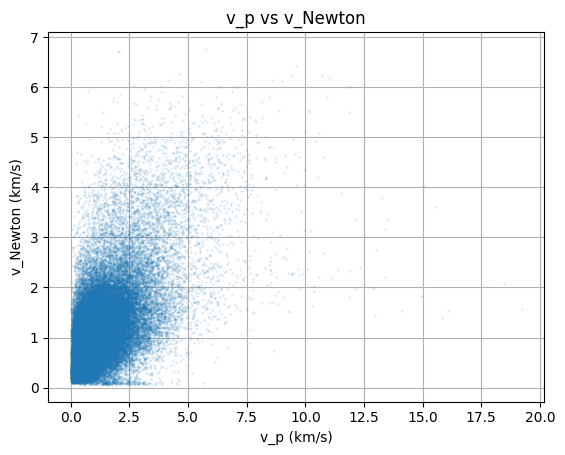

In [31]:
plt.plot(chae_dt['v_p'], chae_dt['v_Newton'], 'o', markersize=1, alpha=0.1)
plt.xlabel('v_p (km/s)')
plt.ylabel('v_Newton (km/s)')
plt.title('v_p vs v_Newton')
plt.grid()
plt.show()

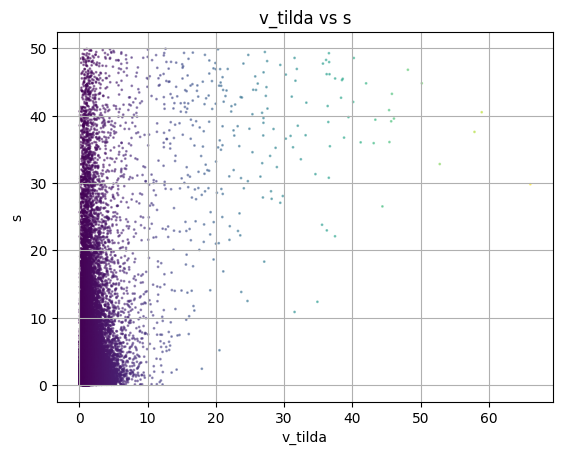

In [32]:
plt.scatter(chae_dt['v_tilda'], chae_dt['s[kau]'], c=chae_dt['v_tilda'], cmap='viridis', s=1, alpha=0.5)
plt.xlabel('v_tilda')
plt.ylabel('s')
plt.title('v_tilda vs s')
plt.grid()
plt.show()

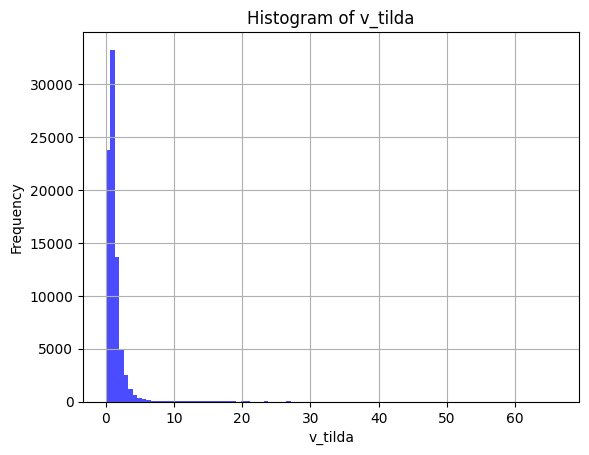

In [33]:
plt.hist(chae_dt['v_tilda'], bins=100, color='blue', alpha=0.7)
plt.xlabel('v_tilda')
plt.ylabel('Frequency')
plt.title('Histogram of v_tilda')
plt.grid()
plt.show()

#### Newtonian Simulation

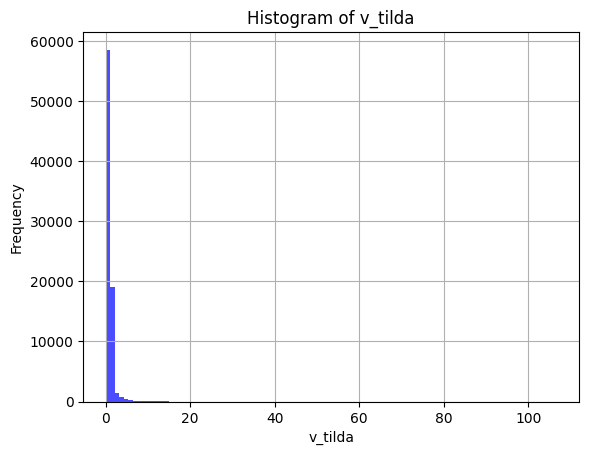

In [34]:
plt.hist(n_chae_dt['v_tilda'], bins=100, color='blue', alpha=0.7)
plt.xlabel('v_tilda')
plt.ylabel('Frequency')
plt.title('Histogram of v_tilda')
plt.grid()
plt.show()

#### Deviations

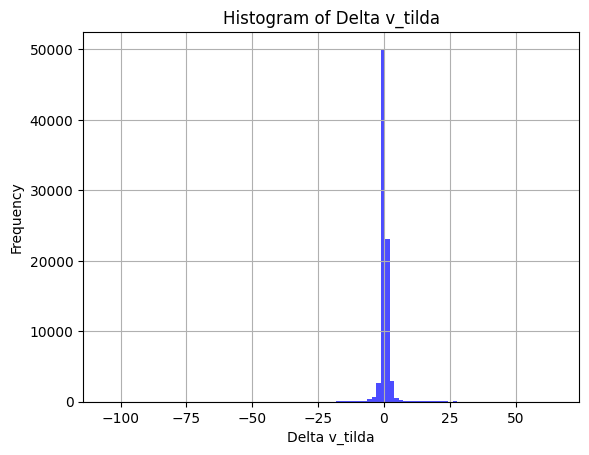

In [35]:
plt.hist(delta_v, bins=100, color='blue', alpha=0.7)
plt.xlabel('Delta v_tilda')
plt.ylabel('Frequency')
plt.title('Histogram of Delta v_tilda')
plt.grid()
plt.show()

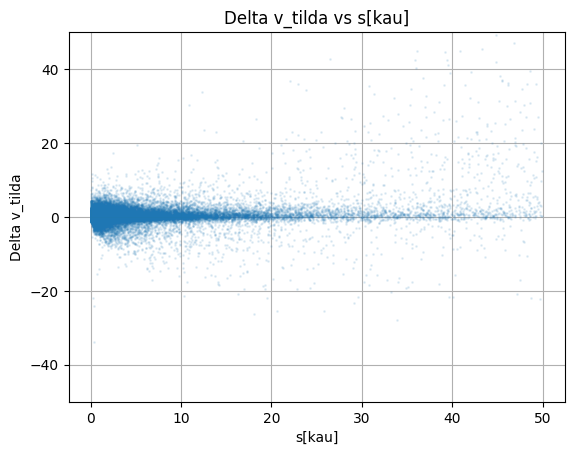

In [36]:
plt.plot(chae_dt['s[kau]'], delta_v, 'o', markersize=1, alpha=0.1)
plt.xlabel('s[kau]')
plt.ylabel('Delta v_tilda')
plt.title('Delta v_tilda vs s[kau]')
plt.ylim(-50, 50)
plt.grid()
plt.show()

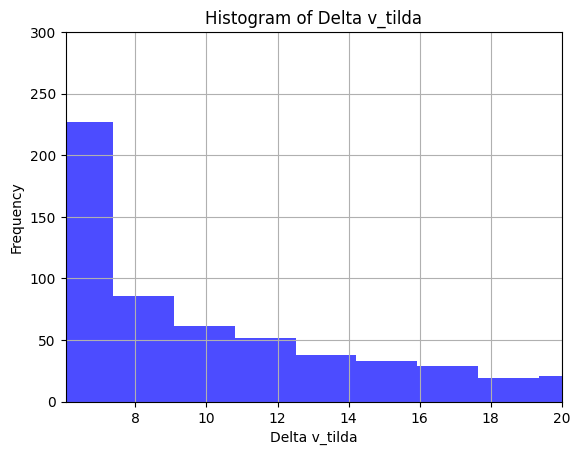

In [37]:
plt.hist(delta_v, bins=100, color='blue', alpha=0.7)
plt.xlabel('Delta v_tilda')
plt.ylabel('Frequency')
plt.xlim(3*std_delta_v,20)
plt.ylim(0, 300)
plt.title('Histogram of Delta v_tilda')
plt.grid()
plt.show()

#### Filtered Deviations

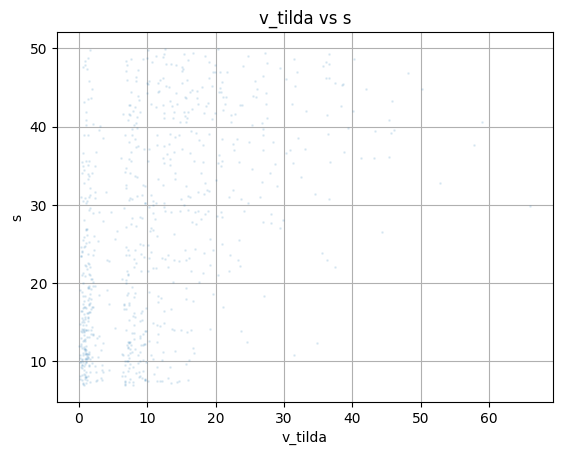

In [38]:
plt.plot(dev_dt['v_tilda'], dev_dt['s[kau]'], 'o', markersize=1, alpha=0.1)
plt.xlabel('v_tilda')
plt.ylabel('s')
plt.title('v_tilda vs s')
plt.grid()
plt.show()

## Export data

In [39]:
dev_dt_reset = dev_dt.reset_index(drop=True)
dev_dt_reset.head()

,source_id1,source_id2,R_chance,s[kau],d1[pc],d1_err[pc],d2[pc],d2_err[pc],MagG1,MagG2,M1[Msun],M2[Msun],mu1ra[mas/yr],mu1ra_err[mas/yr],mu1dec[mas/yr],mu1dec_err[mas/yr],mu2ra[mas/yr],mu2ra_err[mas/yr],mu2dec[mas/yr],mu2dec_err[mas/yr],RV1[km/s],RV1_err[km/s],RV2[km/s],RV2_err[km/s],gal_b[deg],ruwe1,ruwe2,bp_rp1,bp_rp2,RA1[deg],DEC1[deg],RA2[deg],DEC2[deg],e,e0,e1,A_G_A[mag],A_G_B[mag],v_p,v_Newton,v_tilda
0,6128695169196515072,6128695203548587392,0.282982,10.746391,198.225593,1.265574,219.220639,18.877437,8.768520,12.983512,0.493551,0.129993,-17.831942,0.024037,26.686046,0.018744,-17.990994,0.298596,27.728608,0.234459,-13.491237,4.011915,-20000.000000,10.000000,15.328703,4.071595,2.681269,2.128868,3.099487,187.842756,-47.404685,187.821937,-47.410001,0.67,0.410195,0.888797,0.0,0.0,1.477442,0.226883,6.511912
1,6151540203314762368,6151539722277432704,1.373592,23.548500,173.755779,0.572969,261.616119,50.062797,7.869980,13.244575,0.601694,0.120286,-26.582123,0.014892,3.311959,0.015244,-25.204025,0.563118,2.892553,0.689537,-8.902043,2.319278,-20000.000000,10.000000,25.374224,1.451192,1.009302,1.760192,2.603153,186.839130,-37.248531,186.882463,-37.263619,0.99,0.723597,1.000000,0.0,0.0,2.144404,0.164923,13.002468
2,4145925883520462976,4145926849911590912,1.340508,41.004844,109.205775,0.455055,82.601965,8.624980,10.139208,15.843053,0.337376,0.080744,-18.476524,0.039665,-16.029017,0.031452,-18.153162,1.931347,-13.195339,1.393055,29.333357,5.311174,-20000.000000,10.000000,2.175287,0.989595,1.167041,2.669726,2.947975,271.955967,-15.767433,272.061782,-15.744910,0.78,0.512239,0.954477,0.0,0.0,1.851089,0.095111,19.462319
3,4495187817964974208,4495187955403860352,0.002149,7.637160,89.914767,0.100287,89.815003,0.154022,5.805054,7.277336,0.852611,0.672713,22.933065,0.010763,10.449768,0.009233,23.223500,0.017572,9.669992,0.014957,10.161104,0.199992,9.972655,0.418583,15.283726,1.028104,0.972550,1.037347,1.531839,271.320206,11.273332,271.336364,11.290813,0.65,0.454635,0.871775,0.0,0.0,0.501260,0.420935,1.190825
4,177811272394668416,177801376788384896,1.204290,48.949728,75.452228,3.470868,102.360923,10.493255,2.756287,15.556375,1.476144,0.081580,-24.567704,0.700221,-13.311485,0.454373,-21.736737,1.389347,-11.343029,0.950145,-10000.000000,10.000000,-20000.000000,10.000000,-8.672857,2.077068,2.145912,0.461818,2.539673,64.875776,37.998314,65.094479,37.945859,0.87,0.581821,0.985875,0.0,0.0,2.078358,0.168024,12.369447


Export indices:

In [40]:
source_ids_dev1 = dev_dt['source_id1'].values
dev1 = pd.DataFrame(source_ids_dev1, columns=['source_id'])
csv_dev1 = dev1.to_csv(index=False)
with open("dev1.csv", "w") as f:
    f.write(csv_dev1)

In [41]:
source_ids_dev2 = dev_dt['source_id2'].values
dev2 = pd.DataFrame(source_ids_dev2, columns=['source_id'])
csv_dev2 = dev2.to_csv(index=False)
with open("dev2.csv", "w") as f:
    f.write(csv_dev2)

ADQL query to get the data from Gaia: (https://gea.esac.esa.int/archive/)

```SELECT g.*
FROM gaiadr3.gaia_source AS g
JOIN dev1 AS d
ON g.source_id = d.source_id

```SELECT g.*
FROM gaiadr3.gaia_source AS g
JOIN dev2 AS d
ON g.source_id = d.source_id

Export deviating dataframe:

In [42]:
dev_dt_reset.to_csv('Data//DEV.csv',index=False)

# Al-Badry deviation mapping

fdt == Filtered dataset (dropped unnecessary columns) </br>
tr_dt == Drop positional info </br>
filtered_df == Dataset after the correlation cutoff  </br>
sm_df == SMOTE balanced train dataset </br>
pca_df == PCA dataset

## Load data

In [43]:
hdul = fits.open('Data//all_columns_catalog.fits')
data = hdul[1].data
df = pd.DataFrame(data)
dt = df.copy()
dt['target'] = 0   

In [161]:
len(dt), len(dt.columns)

(1817594, 218)

## EDA

In [44]:
dt.head()

,solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_source_id1,dr2_source_id2,dr2_parallax1,dr2_parallax2,dr2_parallax_error1,dr2_parallax_error2,dr2_pmra1,dr2_pmra2,dr2_pmdec1,dr2_pmdec2,dr2_pmra_error1,dr

In [45]:
dev_dt_reset.head()

,source_id1,source_id2,R_chance,s[kau],d1[pc],d1_err[pc],d2[pc],d2_err[pc],MagG1,MagG2,M1[Msun],M2[Msun],mu1ra[mas/yr],mu1ra_err[mas/yr],mu1dec[mas/yr],mu1dec_err[mas/yr],mu2ra[mas/yr],mu2ra_err[mas/yr],mu2dec[mas/yr],mu2dec_err[mas/yr],RV1[km/s],RV1_err[km/s],RV2[km/s],RV2_err[km/s],gal_b[deg],ruwe1,ruwe2,bp_rp1,bp_rp2,RA1[deg],DEC1[deg],RA2[deg],DEC2[deg],e,e0,e1,A_G_A[mag],A_G_B[mag],v_p,v_Newton,v_tilda
0,6128695169196515072,6128695203548587392,0.282982,10.746391,198.225593,1.265574,219.220639,18.877437,8.768520,12.983512,0.493551,0.129993,-17.831942,0.024037,26.686046,0.018744,-17.990994,0.298596,27.728608,0.234459,-13.491237,4.011915,-20000.000000,10.000000,15.328703,4.071595,2.681269,2.128868,3.099487,187.842756,-47.404685,187.821937,-47.410001,0.67,0.410195,0.888797,0.0,0.0,1.477442,0.226883,6.511912
1,6151540203314762368,6151539722277432704,1.373592,23.548500,173.755779,0.572969,261.616119,50.062797,7.869980,13.244575,0.601694,0.120286,-26.582123,0.014892,3.311959,0.015244,-25.204025,0.563118,2.892553,0.689537,-8.902043,2.319278,-20000.000000,10.000000,25.374224,1.451192,1.009302,1.760192,2.603153,186.839130,-37.248531,186.882463,-37.263619,0.99,0.723597,1.000000,0.0,0.0,2.144404,0.164923,13.002468
2,4145925883520462976,4145926849911590912,1.340508,41.004844,109.205775,0.455055,82.601965,8.624980,10.139208,15.843053,0.337376,0.080744,-18.476524,0.039665,-16.029017,0.031452,-18.153162,1.931347,-13.195339,1.393055,29.333357,5.311174,-20000.000000,10.000000,2.175287,0.989595,1.167041,2.669726,2.947975,271.955967,-15.767433,272.061782,-15.744910,0.78,0.512239,0.954477,0.0,0.0,1.851089,0.095111,19.462319
3,4495187817964974208,4495187955403860352,0.002149,7.637160,89.914767,0.100287,89.815003,0.154022,5.805054,7.277336,0.852611,0.672713,22.933065,0.010763,10.449768,0.009233,23.223500,0.017572,9.669992,0.014957,10.161104,0.199992,9.972655,0.418583,15.283726,1.028104,0.972550,1.037347,1.531839,271.320206,11.273332,271.336364,11.290813,0.65,0.454635,0.871775,0.0,0.0,0.501260,0.420935,1.190825
4,177811272394668416,177801376788384896,1.204290,48.949728,75.452228,3.470868,102.360923,10.493255,2.756287,15.556375,1.476144,0.081580,-24.567704,0.700221,-13.311485,0.454373,-21.736737,1.389347,-11.343029,0.950145,-10000.000000,10.000000,-20000.000000,10.000000,-8.672857,2.077068,2.145912,0.461818,2.539673,64.875776,37.998314,65.094479,37.945859,0.87,0.581821,0.985875,0.0,0.0,2.078358,0.168024,12.369447


In [46]:
dev_dt_reset['source_id1'].isin(dt['source_id1']).sum(), len(dev_dt_reset)

(738, 738)

In [47]:
dev_dt_reset['source_id2'].isin(dt['source_id2']).sum(), len(dev_dt_reset)

(738, 738)

In [48]:
chae_dt['source_id1'].isin(dt['source_id1']).sum(), len(chae_dt)

(81088, 81088)

In [49]:
chae_dt['source_id2'].isin(dt['source_id2']).sum(), len(chae_dt)

(81088, 81088)

The above results imply that all the data in the deviations dataframe (obtained from Chae's dataset) is present in the Al-Badry catalogue.

## Filter data

In [50]:
fdt = dt[dt['source_id1'].isin(chae_dt['source_id1'])]

In [51]:
fdt.select_dtypes(exclude='number').columns

Index(['astrometric_primary_flag1', 'astrometric_primary_flag2',
       'duplicated_source1', 'duplicated_source2', 'binary_type'],
      dtype='object')

In [52]:
fdt[fdt.select_dtypes(exclude='number').columns].head()

,astrometric_primary_flag1,astrometric_primary_flag2,duplicated_source1,duplicated_source2,binary_type
18,False,False,False,False,MSMS
45,False,False,False,False,MSMS
46,True,False,False,False,MSMS
141,False,False,False,False,MSMS
207,False,False,False,False,MSMS


In [53]:
fdt[fdt.select_dtypes(exclude='number').columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81088 entries, 18 to 1817570
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   astrometric_primary_flag1  81088 non-null  bool  
 1   astrometric_primary_flag2  81088 non-null  bool  
 2   duplicated_source1         81088 non-null  bool  
 3   duplicated_source2         81088 non-null  bool  
 4   binary_type                81088 non-null  object
dtypes: bool(4), object(1)
memory usage: 1.5+ MB


In [54]:
print(fdt.columns[fdt.isnull().sum() > 0]) # Check for null values in non-numeric columns

Index(['dr2_parallax1', 'dr2_parallax2', 'dr2_parallax_error1',
       'dr2_parallax_error2', 'dr2_pmra1', 'dr2_pmra2', 'dr2_pmdec1',
       'dr2_pmdec2', 'dr2_pmra_error1', 'dr2_pmra_error2', 'dr2_pmdec_error1',
       'dr2_pmdec_error2'],
      dtype='object')


In [55]:
fdt.head()

,solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_source_id1,dr2_source_id2,dr2_parallax1,dr2_parallax2,dr2_parallax_error1,dr2_parallax_error2,dr2_pmra1,dr2_pmra2,dr2_pmdec1,dr2_pmdec2,dr2_pmra_error1,dr

In [56]:
fdt = fdt.drop(columns=['solution_id1', 'solution_id2', 'random_index1', 'random_index2', 'ref_epoch1','ref_epoch2', 
       'dr2_parallax1', 'dr2_parallax2', 'dr2_parallax_error1',
       'dr2_parallax_error2', 'dr2_pmra1', 'dr2_pmra2', 'dr2_pmdec1',
       'dr2_pmdec2', 'dr2_pmra_error1', 'dr2_pmra_error2', 'dr2_pmdec_error1',
       'dr2_pmdec_error2', 'dr2_source_id1', 'dr2_source_id2'])

In [57]:
fdt.head()

,source_id1,source_id2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_ruwe1,dr2_ruwe2,target
18,4282728430212942464,4282728430212941568,283.193084,283.195097,0.014956,0.022176,6.061580,6.060929,0.013390,0.020382,8.957439,9.037475,0.015919,0.025076,562.702881,360.407593,76.718140,78.205444,-71.485170

## Mark targets

### Mark

In [58]:
fdt['target'] = fdt['source_id1'].isin(dev_dt_reset['source_id1']).astype(int)

In [59]:
fdt.head()

,source_id1,source_id2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_ruwe1,dr2_ruwe2,target
18,4282728430212942464,4282728430212941568,283.193084,283.195097,0.014956,0.022176,6.061580,6.060929,0.013390,0.020382,8.957439,9.037475,0.015919,0.025076,562.702881,360.407593,76.718140,78.205444,-71.485170

### Value counts

In [60]:
fdt['target'].value_counts()

0    80350
1      738
Name: target, dtype: int64

## Pre-processing

### Drop positional info

In [61]:
fdt.head()

,source_id1,source_id2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_ruwe1,dr2_ruwe2,target
18,4282728430212942464,4282728430212941568,283.193084,283.195097,0.014956,0.022176,6.061580,6.060929,0.013390,0.020382,8.957439,9.037475,0.015919,0.025076,562.702881,360.407593,76.718140,78.205444,-71.485170

In [62]:
fdt.columns.to_list()

['source_id1',
 'source_id2',
 'ra1',
 'ra2',
 'ra_error1',
 'ra_error2',
 'dec1',
 'dec2',
 'dec_error1',
 'dec_error2',
 'parallax1',
 'parallax2',
 'parallax_error1',
 'parallax_error2',
 'parallax_over_error1',
 'parallax_over_error2',
 'pm1',
 'pm2',
 'pmra1',
 'pmra2',
 'pmra_error1',
 'pmra_error2',
 'pmdec1',
 'pmdec2',
 'pmdec_error1',
 'pmdec_error2',
 'ra_dec_corr1',
 'ra_dec_corr2',
 'ra_parallax_corr1',
 'ra_parallax_corr2',
 'ra_pmra_corr1',
 'ra_pmra_corr2',
 'ra_pmdec_corr1',
 'ra_pmdec_corr2',
 'dec_parallax_corr1',
 'dec_parallax_corr2',
 'dec_pmra_corr1',
 'dec_pmra_corr2',
 'dec_pmdec_corr1',
 'dec_pmdec_corr2',
 'parallax_pmra_corr1',
 'parallax_pmra_corr2',
 'parallax_pmdec_corr1',
 'parallax_pmdec_corr2',
 'pmra_pmdec_corr1',
 'pmra_pmdec_corr2',
 'astrometric_n_obs_al1',
 'astrometric_n_obs_al2',
 'astrometric_n_obs_ac1',
 'astrometric_n_obs_ac2',
 'astrometric_n_good_obs_al1',
 'astrometric_n_good_obs_al2',
 'astrometric_n_bad_obs_al1',
 'astrometric_n_bad_obs_

Essentially eliminate positional information so as to avoid any inherent bias in the model.

In [63]:
tr_dt = fdt.drop(columns=['source_id1', 'source_id2', 'ra1',
 'ra2',
 'ra_error1',
 'ra_error2',
 'dec1',
 'dec2',
 'dec_error1',
 'dec_error2',
 'parallax1',
 'parallax2',
 'parallax_error1',
 'parallax_error2',
 'parallax_over_error1',
 'parallax_over_error2',
 'ra_dec_corr1',
 'ra_dec_corr2',
 'ra_parallax_corr1',
 'ra_parallax_corr2',
 'ra_pmra_corr1',
 'ra_pmra_corr2',
 'ra_pmdec_corr1',
 'ra_pmdec_corr2',
 'dec_parallax_corr1',
 'dec_parallax_corr2',
 'dec_pmra_corr1',
 'dec_pmra_corr2',
 'dec_pmdec_corr1',
 'dec_pmdec_corr2',
 'parallax_pmra_corr1',
 'parallax_pmra_corr2',
 'parallax_pmdec_corr1',
 'parallax_pmdec_corr2',
 'ra_pseudocolour_corr1',
 'ra_pseudocolour_corr2',
 'dec_pseudocolour_corr1',
 'dec_pseudocolour_corr2',
 'parallax_pseudocolour_corr1',
 'parallax_pseudocolour_corr2',
 'binary_type'])

In [64]:
len(fdt.columns), len(tr_dt.columns)

(198, 157)

### Check correlation

#### Correlation cutoff

In [65]:
def select_features_by_correlation(df, target_column='target', correlation_cutoff=0.05):
    """
    Selects numeric features from a DataFrame based on point-biserial correlation with a binary target.

    Parameters:
    - df: pandas DataFrame containing features and the target column
    - target_column: name of the target column (must be binary: 0 or 1) (default: 'target')
    - correlation_cutoff: absolute correlation threshold to select features

    Returns:
    - A filtered DataFrame with selected features and the target column
    - A DataFrame of all correlations
    """
    target = df[target_column]
    features = df.drop(columns=[target_column])

    numeric_features = features.select_dtypes(include='number')

    correlations = {}
    for col in numeric_features.columns:
        corr, _ = pointbiserialr(target, numeric_features[col])
        correlations[col] = abs(corr)

    corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Absolute Correlation'])

    selected_features = corr_df[corr_df['Absolute Correlation'] > correlation_cutoff].index.tolist()

    filtered_df = df[selected_features + [target_column]]
    
    return filtered_df

In [66]:
corr_cutoff_df = select_features_by_correlation(tr_dt)

In [67]:
len(tr_dt.columns), len(corr_cutoff_df.columns)

(157, 27)

#### Top Correlation

In [68]:
def select_top_n_correlated_features(df, target_column='target', top_n=50):
    """
    Selects the top N numeric features based on point-biserial correlation with a binary target.
    Parameters:
    - df: pandas DataFrame containing features and the target column
    - target_column: name of the target column (must be binary: 0 or 1) (default: 'target')
    - top_n: number of top features to select based on correlation (default: 50)
    Returns:
    - A filtered DataFrame with selected features and the target column
    """
    
    target = df[target_column]
    features = df.drop(columns=[target_column])
    numeric_features = features.select_dtypes(include='number')

    correlations = {
        col: abs(pointbiserialr(target, numeric_features[col])[0])
        for col in numeric_features.columns
    }

    corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Absolute Correlation'])
    top_corr = corr_df.sort_values(by='Absolute Correlation', ascending=False).head(top_n)

    filtered_df = df[top_corr.index.tolist() + [target_column]]
    return filtered_df

In [69]:
top_corr_df = select_top_n_correlated_features(tr_dt)

In [70]:
len(tr_dt.columns), len(top_corr_df.columns)

(157, 51)

                              Absolute Correlation
sep_AU                                    0.388923
pairdistance                              0.324119
astrometric_excess_noise2                 0.257666
pmdec_error2                              0.246459
pmra_error2                               0.245271
astrometric_sigma5d_max2                  0.245035
R_chance_align                            0.207418
pmra_error1                               0.153547
astrometric_sigma5d_max1                  0.151104
pmdec_error1                              0.149958
astrometric_excess_noise1                 0.123080
ipd_gof_harmonic_amplitude2               0.118782
phot_rp_mean_mag2                         0.100721
phot_g_mean_mag2                          0.095573
phot_bp_mean_mag2                         0.083334
phot_rp_mean_mag1                         0.068609
phot_g_mean_mag1                          0.065837
astrometric_params_solved2                0.065145
nu_eff_used_in_astrometry2     

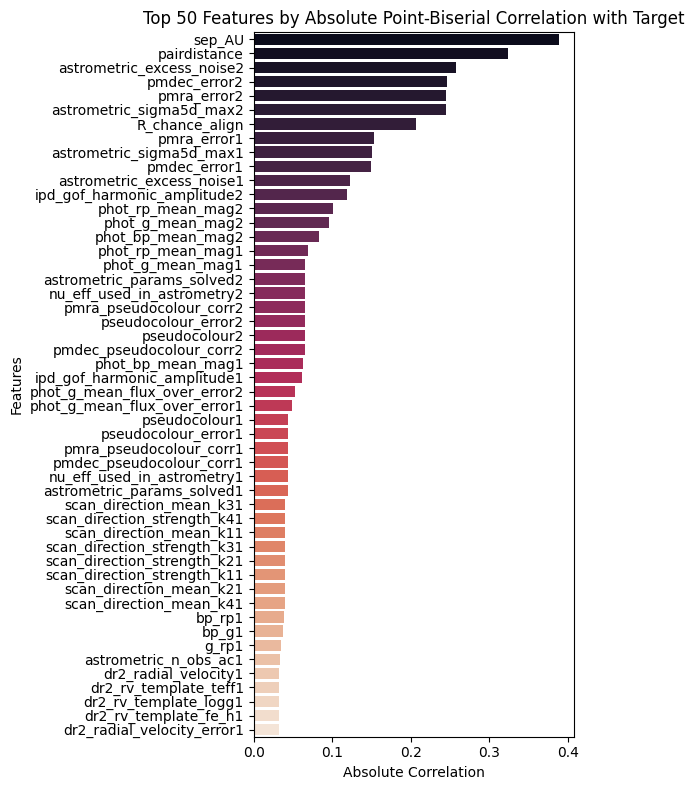

In [71]:
top_n = 50
target = tr_dt['target']
features = tr_dt.drop(columns=['target'])

# Only numeric features
numeric_features = features.select_dtypes(include='number')

# Compute correlations
correlations = {}
for col in numeric_features.columns:
    corr, _ = pointbiserialr(target, numeric_features[col])
    correlations[col] = abs(corr)  # Take absolute value

# Create DataFrame and get top {top_n} features
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Absolute Correlation'])
top_corr = corr_df.sort_values(by='Absolute Correlation', ascending=False).head(top_n)
top_corr_df = tr_dt[top_corr.index.to_list() + ['target']]

# Display top {top_n}
print(top_corr)

# Plot
plt.figure(figsize=(6, 8))
sns.barplot(x='Absolute Correlation', y=top_corr.index, data=top_corr, palette='rocket')
plt.title(f'Top {top_n} Features by Absolute Point-Biserial Correlation with Target')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [72]:
len(top_corr_df.columns), len(tr_dt.columns)

(51, 157)

### SMOTE and train-test split

#### Train-test split

In [73]:
train, test = train_test_split(tr_dt, test_size=0.2, random_state=42, stratify=tr_dt['target'])
train_corr_cutoff, test_corr_cutoff = train_test_split(corr_cutoff_df, test_size=0.2, random_state=42, stratify=tr_dt['target'])
train_top_corr, test_top_corr = train_test_split(top_corr_df, test_size=0.2, random_state=42, stratify=tr_dt['target'])

In [74]:
train['target'].value_counts(), test['target'].value_counts()

(0    64280
 1      590
 Name: target, dtype: int64,
 0    16070
 1      148
 Name: target, dtype: int64)

In [75]:
train_corr_cutoff['target'].value_counts(), test_corr_cutoff['target'].value_counts()

(0    64280
 1      590
 Name: target, dtype: int64,
 0    16070
 1      148
 Name: target, dtype: int64)

In [76]:
train_top_corr['target'].value_counts(), test_top_corr['target'].value_counts()

(0    64280
 1      590
 Name: target, dtype: int64,
 0    16070
 1      148
 Name: target, dtype: int64)

#### SMOTE

In [77]:
def smote(dt):
    """
    Function to apply SMOTE to the dataset.
    Args:
        dt (DataFrame): Input DataFrame with features and target.
    Returns:
        DataFrame: Resampled DataFrame with balanced classes.
    """
    X = dt.drop(columns=['target'])
    y = dt['target']
    sm = SMOTE(random_state = 2)
    re_X, re_y = sm.fit_resample(X,y)
    smote_data = pd.DataFrame(re_X).join(re_y)
    return smote_data

In [78]:
sm_df = smote(train)
sm_corr_cutoff_df = smote(train_corr_cutoff)
sm_top_corr_df = smote(train_top_corr)

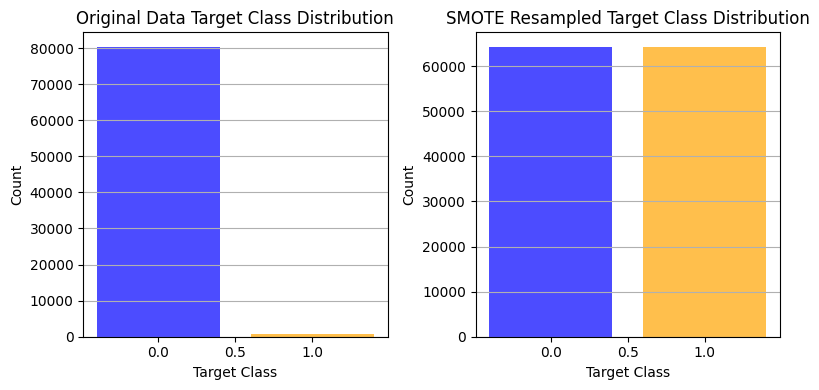

In [79]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Data Target Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.grid(axis='y')
plt.bar(tr_dt['target'].value_counts().index, tr_dt['target'].value_counts(), color=['blue', 'orange'], alpha=0.7)

plt.subplot(1, 2, 2)
plt.title('SMOTE Data Target Class Distribution')
plt.bar(sm_df['target'].value_counts().index, sm_df['target'].value_counts(), color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('SMOTE Resampled Target Class Distribution')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Xtrain, Xtest, ytrain, ytest split

In [80]:
Xtrain, ytrain, Xtest, ytest = train.drop(columns=['target']), train['target'], test.drop(columns=['target']), test['target']
Xtrain_corr_cutoff, ytrain_corr_cutoff, Xtest_corr_cutoff, ytest_corr_cutoff = train_corr_cutoff.drop(columns=['target']), train_corr_cutoff['target'], test_corr_cutoff.drop(columns=['target']), test_corr_cutoff['target']
Xtrain_top_corr, ytrain_top_corr, Xtest_top_corr, ytest_top_corr = train_top_corr.drop(columns=['target']), train_top_corr['target'], test_top_corr.drop(columns=['target']), test_top_corr['target']

sm_Xtest, sm_ytest == Xtest, ytest                                                          </br>
sm_Xtest_corr_cutoff, sm_ytest_corr_cutoff == Xtest_corr_cutoff, ytest_corr_cutoff          </br>
sm_Xtest_top_corr, sm_ytest_top_corr == Xtest_top_corr, ytest_top_corr                      </br>

(The testing for smote data is performed on the original dataset)

In [81]:
sm_Xtrain, sm_ytrain = sm_df.drop(columns=['target']), sm_df['target']
sm_Xtrain_corr_cutoff, sm_ytrain_corr_cutoff = sm_corr_cutoff_df.drop(columns=['target']), sm_corr_cutoff_df['target']
sm_Xtrain_top_corr, sm_ytrain_top_corr = sm_top_corr_df.drop(columns=['target']), sm_top_corr_df['target']

### PCA

#### Function

In [120]:
def perform_pca(df, target_column='target', n_components=None):
    """
    Perform PCA on a DataFrame after standardizing features.

    Parameters:
    - df: pandas DataFrame (numeric)
    - target_column: name of target column to exclude (default: 'target')
    - n_components: number of principal components to keep (default: all)

    Returns:
    - pca_df: DataFrame of principal components
    - pca_model: the fitted PCA object
    """
    if target_column:
        features = df.drop(columns=[target_column])
    else:
        features = df.copy()

    # Standardize features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)

    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)

    # Create column names for PCs
    pc_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
    pca_df = pd.DataFrame(principal_components, columns=pc_columns, index=df.index)

    # Optionally add back target
    if target_column:
        pca_df[target_column] = df[target_column].values

    return pca_df, pca

In [121]:
# Using top_n_filtered_df, assuming 'target' is the target column
pca_df, pca_model = perform_pca(tr_dt, n_components=0.95)
pca_df_corr_cutoff, pca_model_corr_cutoff = perform_pca(corr_cutoff_df, n_components=0.95)
pca_df_top_corr, pca_model_top_corr = perform_pca(top_corr_df, n_components=0.95)

In [122]:
len(pca_df.columns), len(pca_df_corr_cutoff.columns), len(pca_df_top_corr.columns)

(56, 10, 13)

In [123]:
sm_pca_df, sm_pca_model = perform_pca(sm_df, n_components=0.95)
sm_pca_df_corr_cutoff, sm_pca_model_corr_cutoff = perform_pca(sm_corr_cutoff_df, n_components=0.95)
sm_pca_df_top_corr, sm_pca_model_top_corr = perform_pca(sm_top_corr_df, n_components=0.95)

In [124]:
len(sm_pca_df.columns), len(sm_pca_df_corr_cutoff.columns), len(sm_pca_df_top_corr.columns)

(54, 9, 12)

#### Optimal PCA components

In [125]:
def find_optimal_pca_components(pca_model, threshold=0.95):
    cum_var = pca_model.explained_variance_ratio_.cumsum()
    return (cum_var < threshold).sum() + 1

In [126]:
opt, opt_corr_cutoff, opt_top_corr = find_optimal_pca_components(pca_model), find_optimal_pca_components(pca_model_corr_cutoff), find_optimal_pca_components(pca_model_top_corr)

In [127]:
opt, opt_corr_cutoff, opt_top_corr

(55, 9, 12)

In [128]:
pca_df, pca_model = perform_pca(tr_dt, n_components=opt)
pca_df_corr_cutoff, pca_model_corr_cutoff = perform_pca(corr_cutoff_df, n_components=opt_corr_cutoff)
pca_df_top_corr, pca_model_top_corr = perform_pca(top_corr_df, n_components=opt_top_corr)

In [129]:
len(pca_df.columns), len(pca_df_corr_cutoff.columns), len(pca_df_top_corr.columns)

(56, 10, 13)

In [130]:
sm_opt, sm_opt_corr_cutoff, sm_opt_top_corr = find_optimal_pca_components(sm_pca_model), find_optimal_pca_components(sm_pca_model_corr_cutoff), find_optimal_pca_components(sm_pca_model_top_corr)

In [131]:
sm_opt, sm_opt_corr_cutoff, sm_opt_top_corr

(53, 8, 11)

In [132]:
sm_pca_df, sm_pca_model = perform_pca(sm_df, n_components=sm_opt)
sm_pca_df_corr_cutoff, sm_pca_model_corr_cutoff = perform_pca(sm_corr_cutoff_df, n_components=sm_opt_corr_cutoff)
sm_pca_df_top_corr, sm_pca_model_top_corr = perform_pca(sm_top_corr_df, n_components=sm_opt_top_corr)

(SMOTE must be tested on the original dataset.)

In [134]:
len(sm_pca_df.columns), len(sm_pca_df_corr_cutoff.columns), len(sm_pca_df_top_corr.columns)

(54, 9, 12)

In [135]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,target
18,-2.552342,2.060494,-3.631080,2.986837,0.639039,-0.098514,-1.214433,-1.077416,1.531008,-0.287522,-0.653275,0.638892,-0.077847,0.132430,-1.276364,1.228457,-0.417245,-0.275510,0.966869,0.464761,1.201921,0.977059,0.564806,0.800841,-1.203825,0.520850,-0.474910,0.251994,-0.246875,-0.117422,0.143912,-1.801833,1.754515,-0.197880,-0.512972,0.382017,0.665519,-0.263229,0.511470,0.104306,0.131490,0.195648,-0.433033,-0.038837,-0.283696,-0.718105,0.125836,0.351608,-0.045434,0.029275,1.066537,-0.214057,-0.375046,-0.081230,-0.269914,0
45,-6.131758,3.918637,-2.277518,-2.491148,-4.269476,1.435462,3.825137,1.326901,2.107173,1.498294,2.397099,-0.725258,-0.490477,-1.788027,-0.134241,0.247072,1.968420,-1.406392,0.026683,1.525202,1.716400,1.012262,0.775816,0.533192,-0.162320,-0.639870,-0.499550,0.187720,-1.385951,0.651161,0.069751,-0.190017,0.915410,-0.225174,0.466182,-0.310223,0.118184,-0.117973,0.121762,0.629065,-1.127833,0.047028,0.212073,-0.098471,0.678234,-1.440706,0.198961,0.258099,0.450996,-0.195080,0.121514,-0.033980,0.386811,0.039110,0.062559,0
46,0.460764,9.151599,-0.274227,-7.065557,-3.116540,1.512735,1.566973,-4.296035,1.639476,1.338938,0.464457,-0.308287,-2.115171,-1.326693,-8.596710,-1.023994,4.274019,0.577283,2.851750,0.678256,4.230192,1.380157,-4.890815,0.116876,0.311993,-3.257867,-2.584346,6.596453,1.254568,0.142764,-4.464971,-0.555231,1.745130,2.196222,-5.148646,-1.438202,-6.316553,3.019080,-0.951642,1.052692,-3.933942,-2.081003,4.232632,8.281830,0.235632,2.626559,-5.147770,-5.174646,3.782509,3.625702,-9.853223,-0.394676,-1.911542,1.463437,3.463762,0
141,-3.912555,5.146600,2.702961,0.010183,-0.581986,-1.577595,-5.237432,0.423386,2.202051,-0.473936,-0.627235,-2.099852,-1.013225,2.248988,1.351827,2.127715,-0.913617,-2.300706,-1.482936,-0.021634,1.975565,1.836599,0.010970,-0.006468,-0.218317,0.769208,0.475544,0.112066,-0.182652,-0.215108,0.300070,-0.047751,0.040000,-0.039100,0.134858,-0.292544,0.426900,0.631369,0.184843,0.906009,0.377650,-0.114456,-1.063078,0.826980,1.389473,-1.599001,0.223614,-0.642503,0.322600,0.316784,-0.744958,0.153940,0.747742,-0.839570,-0.631239,0
207,-6.633575,7.219715,3.301803,-0.414737,0.225118,-2.116303,-4.341547,0.976212,1.982213,0.231452,0.316835,-0.822920,-0.269519,0.533725,0.008886,1.277807,-1.848521,0.159934,-0.414057,1.074077,0.090170,0.413977,0.074986,-0.206046,-0.946996,0.179346,-0.013442,-0.363298,0.741092,-0.390936,0.210660,-1.029465,0.251413,-0.444465,0.633162,-0.020072,0.455994,0.338025,-0.617023,0.934072,0.493264,0.458033,-1.399588,0.096293,0.481550,-1.074826,0.060392,0.029051,0.071101,0.471413,-0.628288,0.530298,0.172735,-0.027006,-0.037512,0


In [136]:
sm_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,target
0,4.764837,0.286313,-3.570675,-2.160280,1.180674,-0.112373,-0.444536,0.241070,1.764585,-1.488419,-0.430614,-0.203226,-0.881300,-1.886182,-0.385008,0.035938,-0.829738,0.258995,0.507201,-0.782028,0.761874,-1.173593,0.097697,-0.679137,1.472672,-0.983991,-1.062395,0.114564,-1.180720,0.019775,-0.131886,0.281797,-0.214575,0.670746,0.169943,-0.458021,-0.720008,0.714952,-0.160625,-0.336888,0.330388,-0.085818,-0.080995,-0.115628,-0.426902,0.067880,0.084926,0.555174,0.374253,0.218704,-0.950133,0.216545,-0.031490,0
1,-0.220622,-1.985602,-2.235614,-0.834070,-0.632476,0.140964,-0.561499,0.119645,-2.202941,0.498261,0.896027,2.407256,1.071457,-0.733404,0.408774,1.109245,-0.547255,1.483828,-0.885081,1.630643,1.627933,-0.506084,-0.958024,0.787509,0.752996,1.379691,0.427427,-1.989447,-1.572122,-0.987953,-0.311790,-0.395855,0.178795,-0.209919,-0.183878,-0.959160,0.940493,0.390831,-0.038810,-0.684277,0.530306,0.365945,0.028521,-0.088392,-0.392753,-0.393430,0.506270,-0.016861,-0.081583,0.624220,-0.573622,0.201131,0.625870,0
2,12.556230,-0.200671,6.367900,5.907291,-2.728167,-2.452192,2.291019,2.907341,-1.645989,1.384844,1.074602,1.752361,-1.028357,1.804769,0.645234,1.679412,0.668920,-2.615083,0.076069,-1.038307,-0.654739,0.122908,2.002949,0.483001,0.658474,-0.986031,-0.591303,-0.137530,-0.796524,-0.259909,-0.410409,-0.290202,-0.209034,0.477924,0.623561,0.307150,0.414467,-0.885449,0.630877,-0.164392,-1.522679,0.396711,1.883270,1.318281,0.706526,-0.119258,-0.615635,-0.320007,0.089580,0.132575,-0.102458,0.260469,0.262580,1
3,-5.604571,3.811954,3.409645,1.053075,3.133982,1.698269,-6.195425,-1.539254,-2.358038,0.922430,2.192851,0.059186,-1.496244,-0.726919,2.818366,4.570755,-2.025563,-0.146397,0.885563,0.615117,-1.873918,-0.702084,-0.597657,-1.000850,-0.166849,0.226517,0.200502,0.185987,-0.308523,1.531275,0.870474,3.027662,0.791162,-2.604037,-0.713882,-0.316224,-2.382314,1.952211,5.220221,0.224741,-1.653879,-1.904826,1.162832,0.994406,-0.630466,-0.790607,0.717011,2.392141,-0.740278,-0.860729,0.941194,-1.851143,-0.388764,0
4,2.209345,-6.430453,-2.091513,-1.850564,1.505972,-0.091467,0.563128,0.150136,-1.331368,-0.060301,-0.227578,-1.430375,-0.701501,0.976687,-2.261375,-0.497140,-0.679163,-2.456680,0.907242,-0.120170,-1.266892,-0.325166,0.851088,-0.283310,-0.745519,0.389845,-1.010324,1.676203,1.999669,0.571132,-0.096727,0.483318,0.048814,-0.784685,-1.032414,0.608883,-0.879807,-0.348167,-0.145062,0.466611,-0.292061,1.058925,0.304657,0.914801,1.091938,0.640102,-0.053172,0.284375,0.863389,0.340746,0.109300,0.312643,-0.353443,0


#### Splitting

In [137]:
pca_Xtrain, pca_Xtest, pca_ytrain, pca_ytest = train_test_split(pca_df.drop(columns=['target']), pca_df['target'], test_size=0.2, random_state=42, stratify=pca_df['target'])
pca_Xtrain_corr_cutoff, pca_Xtest_corr_cutoff, pca_ytrain_corr_cutoff, pca_ytest_corr_cutoff = train_test_split(pca_df_corr_cutoff.drop(columns=['target']), pca_df_corr_cutoff['target'], test_size=0.2, random_state=42, stratify=pca_df_corr_cutoff['target'])
pca_Xtrain_top_corr, pca_Xtest_top_corr, pca_ytrain_top_corr, pca_ytest_top_corr = train_test_split(pca_df_top_corr.drop(columns=['target']), pca_df_top_corr['target'], test_size=0.2, random_state=42, stratify=pca_df_top_corr['target'])

In [138]:
sm_pca_Xtrain, sm_pca_ytrain = sm_pca_df.drop(columns=['target']), sm_pca_df['target']
sm_pca_Xtrain_corr_cutoff, sm_pca_ytrain_corr_cutoff = sm_pca_df_corr_cutoff.drop(columns=['target']), sm_pca_df_corr_cutoff['target']
sm_pca_Xtrain_top_corr, sm_pca_ytrain_top_corr = sm_pca_df_top_corr.drop(columns=['target']), sm_pca_df_top_corr['target']

(SMOTE must be tested on the original dataset.)

In [133]:
sm_pca_test_df, sm_pca_test_df_corr_cutoff, sm_pca_test_df_top_corr = perform_pca(test, n_components=sm_opt)[0], perform_pca(test_corr_cutoff, n_components=sm_opt_corr_cutoff)[0], perform_pca(test_top_corr, n_components=sm_opt_top_corr)[0]

In [139]:
sm_pca_Xtest, sm_pca_ytest = sm_pca_test_df.drop(columns=['target']), sm_pca_test_df['target']
sm_pca_Xtest_corr_cutoff, sm_pca_ytest_corr_cutoff = sm_pca_test_df_corr_cutoff.drop(columns=['target']), sm_pca_test_df_corr_cutoff['target']
sm_pca_Xtest_top_corr, sm_pca_ytest_top_corr = sm_pca_test_df_top_corr.drop(columns=['target']), sm_pca_test_df_top_corr['target']

#### Plots

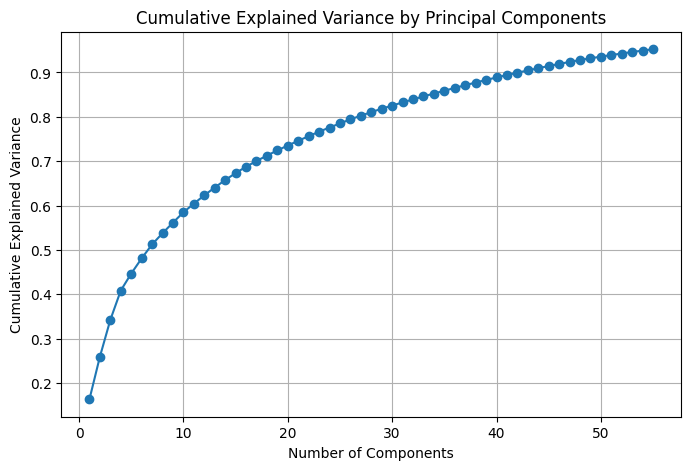

In [140]:
# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_model.explained_variance_ratio_)+1),
         pca_model.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

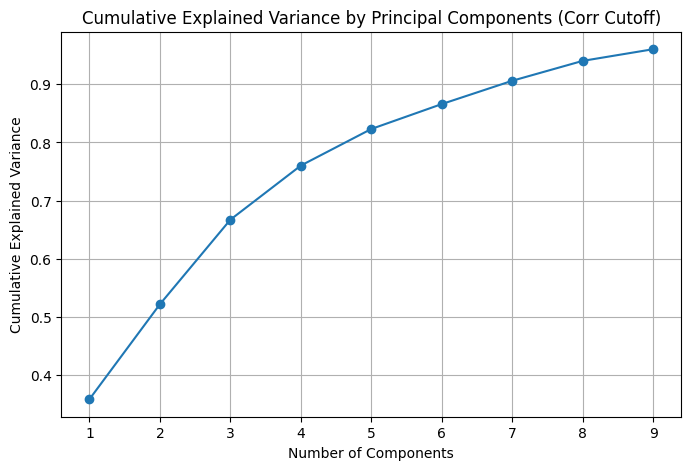

In [141]:
# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_model_corr_cutoff.explained_variance_ratio_)+1),
         pca_model_corr_cutoff.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by Principal Components (Corr Cutoff)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

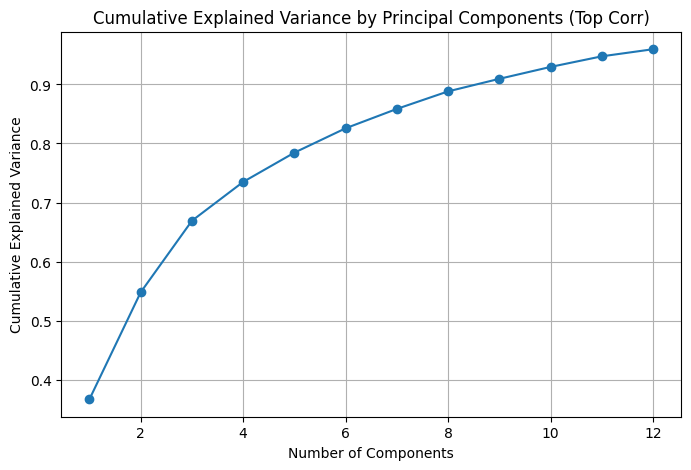

In [142]:
# Plotting explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_model_top_corr.explained_variance_ratio_)+1),
         pca_model_top_corr.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by Principal Components (Top Corr)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

## ML Training

### Functions

In [105]:
def predict(models, X_train, y_train, X_test):
    """
    Function to fit models and make predictions.
    Args:
        models (dict): Dictionary of model names and their instances.
        X_train (DataFrame): Training features.
        y_train (Series): Training target.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target.
    Returns:
        dict: Dictionary of model names and their predictions.
    """
    alg_dict = {}
    print("Training models...\n")
    for name in tqdm(models, desc="Overall Progress"):
        model = models[name]
        with tqdm(total=1, desc=f"Training {name}", leave=True) as pbar:
            model.fit(X_train, y_train)
            alg_dict[name] = model.predict(X_test)
            pbar.update(1)
    return alg_dict

In [106]:
def metric_table_calc(ytest, alg_dict):
    """
    Function to calculate performance metrics for each algorithm.
    Args:
        ytest (Series): True labels for the test set.
        alg_dict (dict): Dictionary of model names and their predictions.
    Returns:
        metric_table(DataFrame): DataFrame containing performance metrics for each algorithm.
    """
    precision = []
    recall = []
    f1 = []
    accuracy = []
    for alg_pred in alg_dict.values():
        precision.append(precision_score(ytest, alg_pred, average='binary', zero_division=0))
        recall.append(recall_score(ytest, alg_pred, average='binary', zero_division=0))
        f1.append(f1_score(ytest, alg_pred, average='binary'))
        accuracy.append(accuracy_score(ytest, alg_pred))
    algs = alg_dict.keys()
    metrics = {'Algorithms':algs,'Precision':precision,'Recall':recall,'F1 score':f1,'Accuracy':accuracy}
    metric_table = pd.DataFrame(metrics)
    metric_table.set_index('Algorithms',inplace=True)

    return metric_table

In [107]:
def cm_anomaly_count(ytest, alg_dict, plot_fig=True):
    """
    Function to calculate confusion matrix and true positives for each algorithm.
    Args:
        ytest (Series): True labels for the test set.
        alg_dict (dict): Dictionary of model names and their predictions.
        plot_fig (bool): Whether to plot confusion matrices or not. (default: True)
    Returns:
        cm_df (DataFrame): DataFrame containing confusion matrix values for each algorithm.
        anomaly_count_table (DataFrame): DataFrame containing true positives and misclassification rates for each algorithm.
    """
    i = 0
    anomaly = ytest.value_counts()[1]
    algs = list(alg_dict.keys())
    true_positives = []
    true_positive_rate = []
    misclassification_counts = []
    misclassification_rate = []
    for alg_pred in alg_dict.values():
        alg_cm = confusion_matrix(ytest, alg_pred)
        [a,b],[c,d] = confusion_matrix(ytest, alg_pred)
        true_positives.append(d)
        true_positive_rate.append(100*d/anomaly)
        misclassification_counts.append(b+c)
        misclassification_rate.append(100*(b+c)/anomaly)
        if plot_fig:
            plt.figure(figsize=(3, 3))
            sns.heatmap(alg_cm, annot=True, fmt='d')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix [{algs[i]}]')
            plt.show()
            i+=1
    cm_df = pd.DataFrame({'Algorithms': algs, 'True Positives': true_positives, 'True Positive Rate (%)': true_positive_rate,
                          'Misclassification Counts': misclassification_counts, 'Misclassification Rate (%)': misclassification_rate})
    cm_df.set_index('Algorithms', inplace=True)
    cm_df = cm_df.sort_values(by='True Positive Rate (%)', ascending=False)
    cm_df = cm_df.round(2)
    
    anomaly_counts = {'Algorithms': algs, 'True positives': true_positives, 'True positive rate (%)': true_positive_rate,
              'Misclassification count': misclassification_counts, 'Misclassification rate (%)':misclassification_rate}
    anomaly_count_table = pd.DataFrame(anomaly_counts)
    anomaly_count_table.set_index('Algorithms', inplace=True)
    return cm_df, anomaly_count_table

### Base data and most correlated data

#### Base data

In [108]:
# Define models
models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'SVM (RBF)': SVC(kernel='rbf'),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
alg_dict = predict(models, Xtrain, ytrain, Xtest)

Training models...



Overall Progress: 100%|██████████| 8/8 [02:19<00:00, 17.44s/it]


In [109]:
metric_table = metric_table_calc(ytest, alg_dict)
display(metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.839506,0.459459,0.593886,0.994266
LR,0.000000,0.000000,0.000000,0.990874
SVM (RBF),0.000000,0.000000,0.000000,0.990874
DTC,0.509091,0.567568,0.536741,0.991059
AdaBoost,0.752381,0.533784,0.624506,0.994142
KNN,0.000000,0.000000,0.000000,0.990874
NB,0.026378,0.601351,0.050539,0.793809
Bagging,0.844444,0.513514,0.638655,0.994697


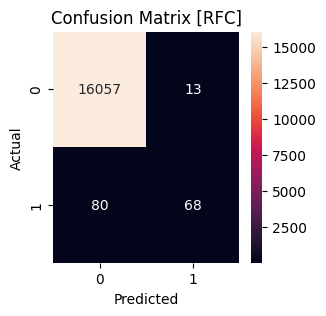

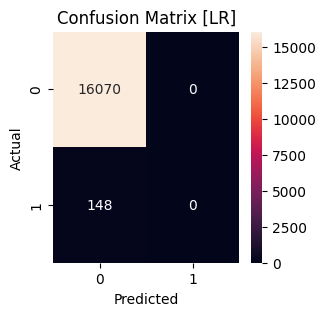

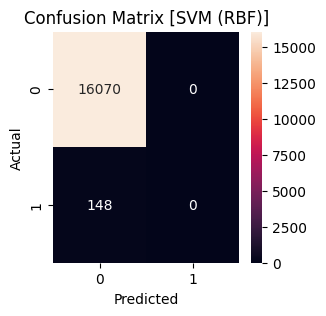

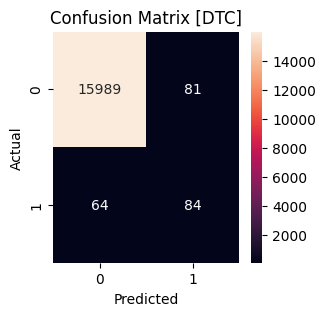

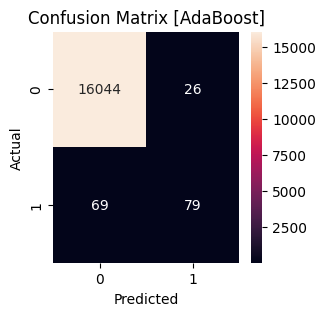

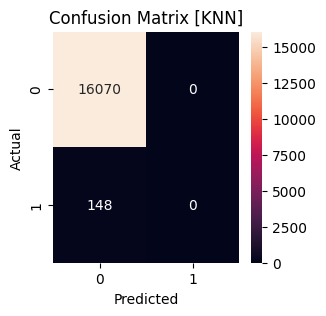

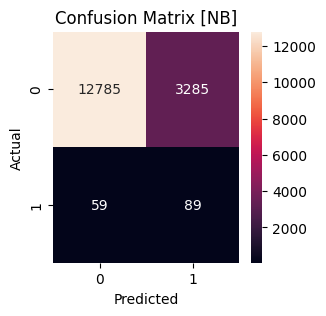

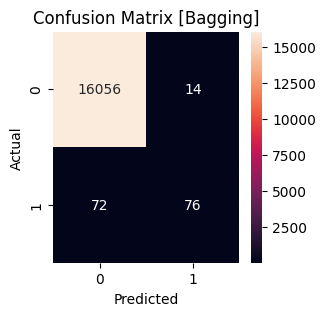

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,68,45.945946,93,62.837838
LR,0,0.000000,148,100.000000
SVM (RBF),0,0.000000,148,100.000000
DTC,84,56.756757,145,97.972973
AdaBoost,79,53.378378,95,64.189189
KNN,0,0.000000,148,100.000000
NB,89,60.135135,3344,2259.459459
Bagging,76,51.351351,86,58.108108


In [110]:
cm_df, anomaly_count_table = cm_anomaly_count(ytest, alg_dict)
display(anomaly_count_table)

#### Correlation cutoff

In [282]:
corr_cutoff_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'SVM (RBF)': SVC(kernel='rbf'),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
alg_dict_corr_cutoff = predict(corr_cutoff_models, Xtrain_corr_cutoff, ytrain_corr_cutoff, Xtest_corr_cutoff)

Training models...



Overall Progress:   0%|          | 0/8 [00:00<?, ?it/s]

Overall Progress: 100%|██████████| 8/8 [00:36<00:00,  4.57s/it]


In [283]:
metric_table_corr_cutoff = metric_table_calc(ytest_corr_cutoff, alg_dict_corr_cutoff)
display(metric_table_corr_cutoff)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.838710,0.527027,0.647303,0.994759
LR,0.000000,0.000000,0.000000,0.990874
SVM (RBF),0.000000,0.000000,0.000000,0.990874
DTC,0.496933,0.547297,0.520900,0.990813
AdaBoost,0.752475,0.513514,0.610442,0.994019
KNN,0.000000,0.000000,0.000000,0.990874
NB,0.000000,0.000000,0.000000,0.990874
Bagging,0.824176,0.506757,0.627615,0.994512


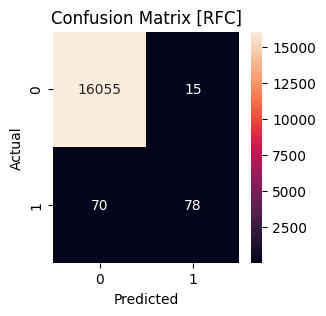

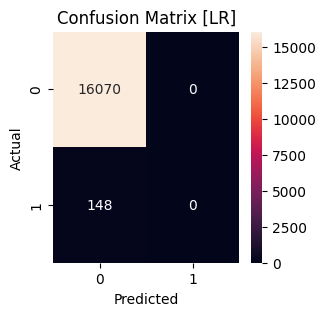

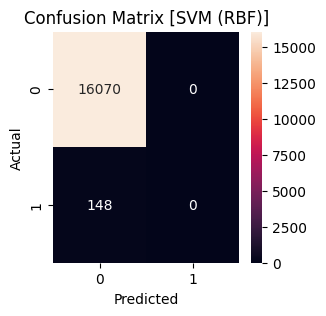

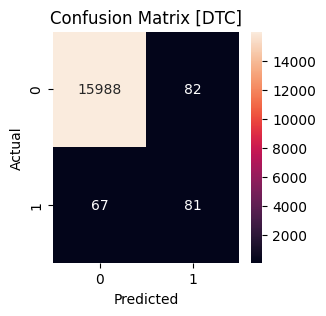

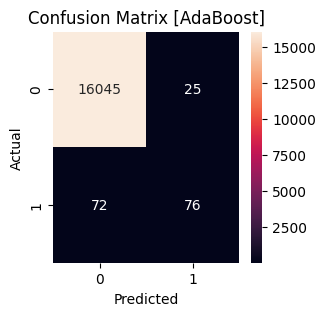

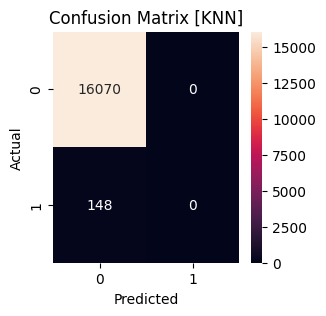

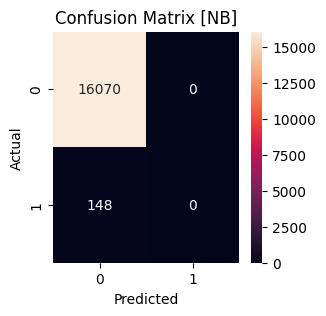

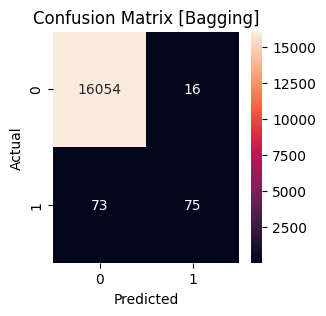

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,78,52.702703,85,57.432432
LR,0,0.000000,148,100.000000
SVM (RBF),0,0.000000,148,100.000000
DTC,81,54.729730,149,100.675676
AdaBoost,76,51.351351,97,65.540541
KNN,0,0.000000,148,100.000000
NB,0,0.000000,148,100.000000
Bagging,75,50.675676,89,60.135135


In [284]:
cm_df_corr_cutoff, anomaly_count_table_corr_cutoff = cm_anomaly_count(ytest_corr_cutoff, alg_dict_corr_cutoff)
display(anomaly_count_table_corr_cutoff)

#### Top correlation

In [114]:
top_corr_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'SVM (RBF)': SVC(kernel='rbf'),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
alg_dict_top_corr = predict(top_corr_models, Xtrain_top_corr, ytrain_top_corr, Xtest_top_corr)

Training models...



Overall Progress: 100%|██████████| 8/8 [00:50<00:00,  6.33s/it]


In [115]:
metric_table_top_corr = metric_table_calc(ytest_top_corr, alg_dict_top_corr)
display(metric_table_top_corr)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.833333,0.506757,0.630252,0.994574
LR,0.000000,0.000000,0.000000,0.990874
SVM (RBF),0.000000,0.000000,0.000000,0.990874
DTC,0.503106,0.547297,0.524272,0.990936
AdaBoost,0.780000,0.527027,0.629032,0.994327
KNN,0.000000,0.000000,0.000000,0.990874
NB,0.023862,0.581081,0.045842,0.779258
Bagging,0.843373,0.472973,0.606061,0.994389


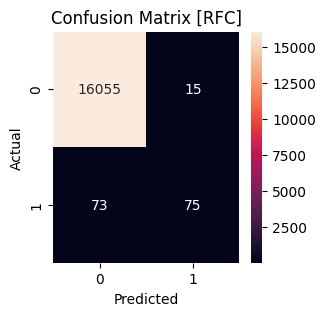

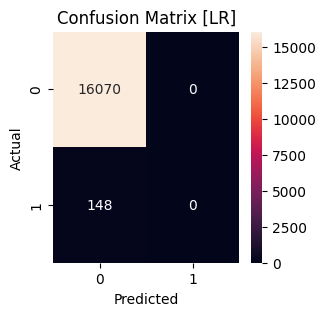

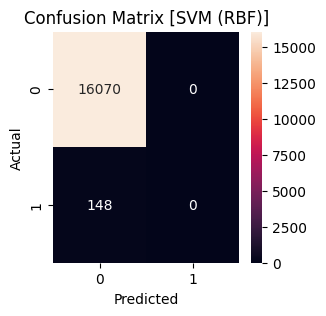

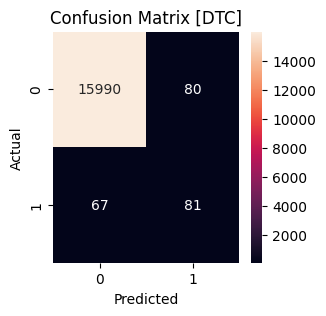

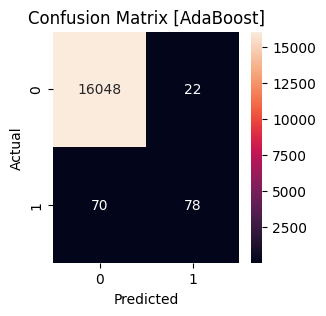

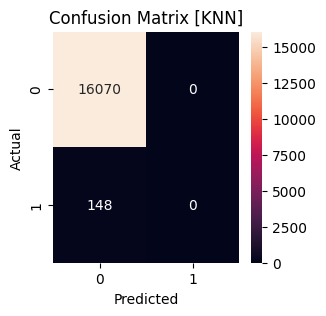

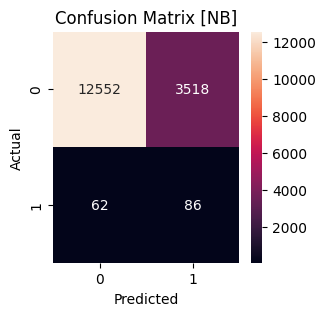

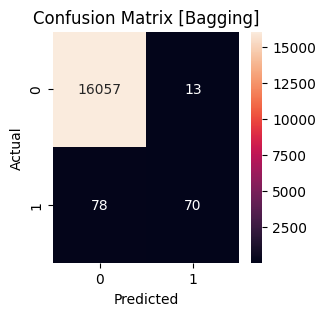

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,75,50.675676,88,59.459459
LR,0,0.000000,148,100.000000
SVM (RBF),0,0.000000,148,100.000000
DTC,81,54.729730,147,99.324324
AdaBoost,78,52.702703,92,62.162162
KNN,0,0.000000,148,100.000000
NB,86,58.108108,3580,2418.918919
Bagging,70,47.297297,91,61.486486


In [116]:
cm_df_top_corr, anomaly_count_table_top_corr = cm_anomaly_count(ytest_top_corr, alg_dict_top_corr)
display(anomaly_count_table_top_corr)

### SMOTE balanced data

(Testing is performed on the original dataset)

#### Base data

In [111]:
sm_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42, max_depth=10, max_leaf_nodes=50),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
sm_alg_dict = predict(sm_models, sm_Xtrain, sm_ytrain, Xtest)

Training models...



Overall Progress: 100%|██████████| 7/7 [12:11<00:00, 104.48s/it]


In [112]:
sm_metric_table = metric_table_calc(ytest, sm_alg_dict)
display(sm_metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.570552,0.628378,0.598071,0.992293
LR,0.019514,0.743243,0.038029,0.656863
DTC,0.176730,0.810811,0.290206,0.963806
AdaBoost,0.188590,0.804054,0.305520,0.966642
KNN,0.000000,0.000000,0.000000,0.990874
NB,0.012901,0.709459,0.025341,0.501973
Bagging,0.397129,0.560811,0.464986,0.988223


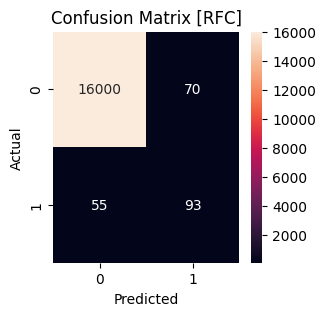

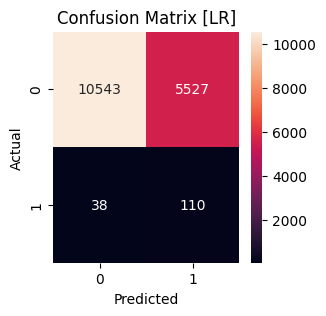

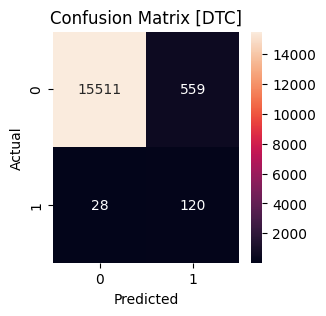

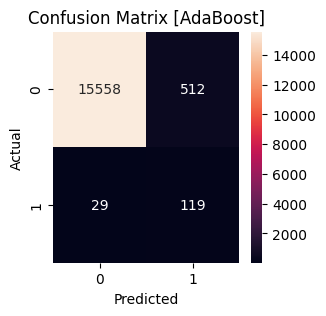

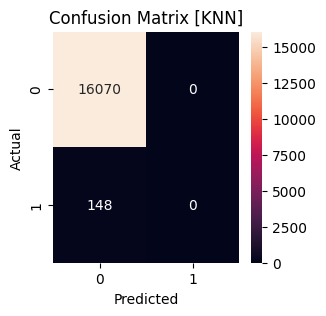

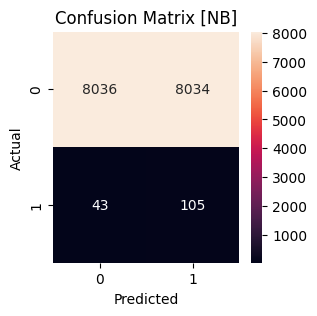

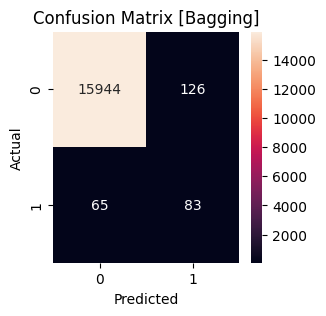

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,93,62.837838,125,84.459459
LR,110,74.324324,5565,3760.135135
DTC,120,81.081081,587,396.621622
AdaBoost,119,80.405405,541,365.540541
KNN,0,0.000000,148,100.000000
NB,105,70.945946,8077,5457.432432
Bagging,83,56.081081,191,129.054054


In [113]:
sm_cm_df, sm_anomaly_count_table = cm_anomaly_count(ytest, sm_alg_dict)
display(sm_anomaly_count_table)

#### Correlation cutoff

In [114]:
sm_corr_cutoff_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
sm_alg_dict_corr_cutoff = predict(sm_corr_cutoff_models, sm_Xtrain_corr_cutoff, sm_ytrain_corr_cutoff, Xtest_corr_cutoff)

Training models...



Overall Progress: 100%|██████████| 7/7 [03:10<00:00, 27.25s/it]


In [115]:
sm_metric_table_corr_cutoff = metric_table_calc(ytest_corr_cutoff, sm_alg_dict_corr_cutoff)
display(sm_metric_table_corr_cutoff)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.358491,0.641892,0.460048,0.986250
LR,0.018000,0.716216,0.035117,0.640831
DTC,0.297735,0.621622,0.402626,0.983167
AdaBoost,0.170330,0.837838,0.283105,0.961278
KNN,0.000000,0.000000,0.000000,0.990874
NB,0.018000,0.716216,0.035117,0.640831
Bagging,0.375000,0.648649,0.475248,0.986928


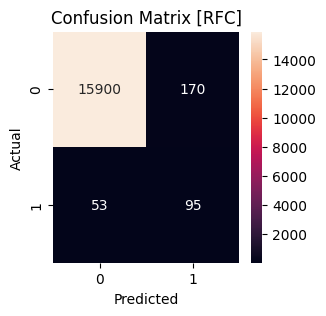

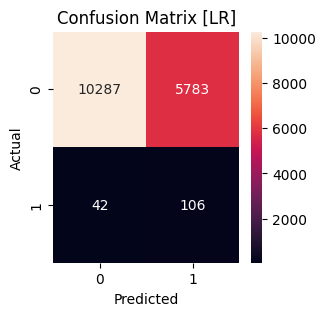

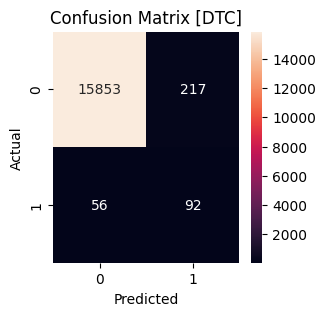

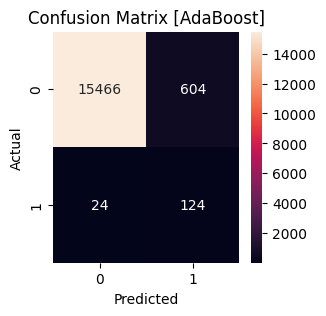

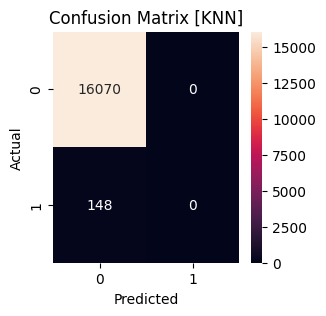

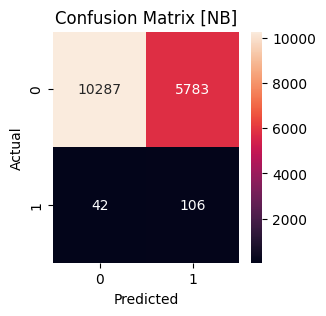

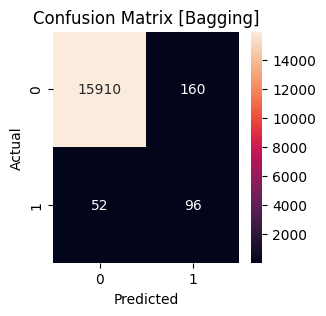

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,95,64.189189,223,150.675676
LR,106,71.621622,5825,3935.810811
DTC,92,62.162162,273,184.459459
AdaBoost,124,83.783784,628,424.324324
KNN,0,0.000000,148,100.000000
NB,106,71.621622,5825,3935.810811
Bagging,96,64.864865,212,143.243243


In [116]:
sm_cm_df_corr_cutoff, sm_anomaly_count_table_corr_cutoff = cm_anomaly_count(ytest_corr_cutoff, sm_alg_dict_corr_cutoff)
display(sm_anomaly_count_table_corr_cutoff)

#### Top correlation

In [117]:
sm_top_corr_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
sm_alg_dict_top_corr = predict(sm_top_corr_models, sm_Xtrain_top_corr, sm_ytrain_top_corr, Xtest_top_corr)

Training models...



Overall Progress: 100%|██████████| 7/7 [05:58<00:00, 51.19s/it]


In [118]:
sm_metric_table_top_corr = metric_table_calc(ytest_top_corr, sm_alg_dict_top_corr)
display(sm_metric_table_top_corr)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.438053,0.668919,0.529412,0.989148
LR,0.018000,0.716216,0.035117,0.640831
DTC,0.287975,0.614865,0.392241,0.982612
AdaBoost,0.152985,0.831081,0.258403,0.956468
KNN,0.000000,0.000000,0.000000,0.990874
NB,0.023256,0.601351,0.044780,0.765877
Bagging,0.369231,0.648649,0.470588,0.986681


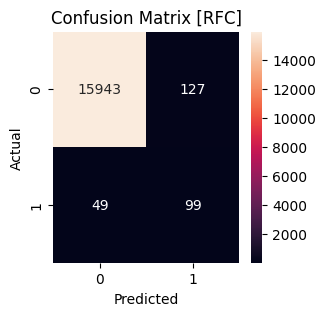

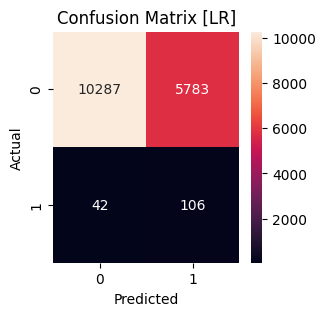

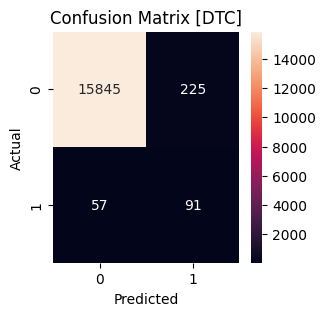

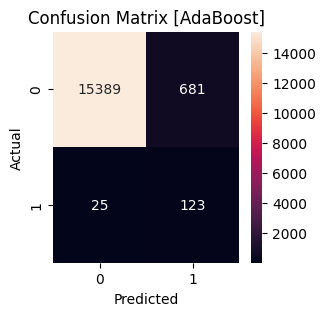

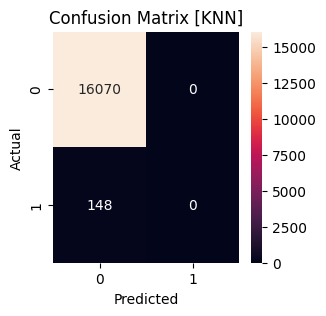

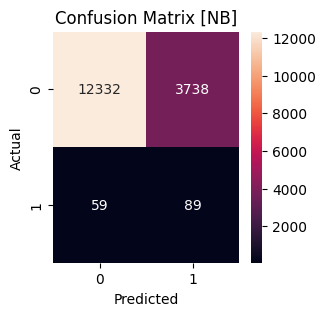

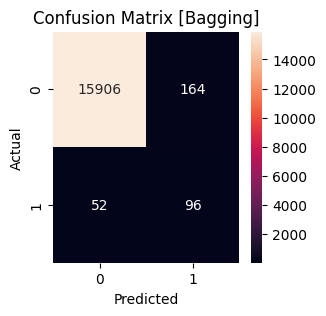

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,99,66.891892,176,118.918919
LR,106,71.621622,5825,3935.810811
DTC,91,61.486486,282,190.540541
AdaBoost,123,83.108108,706,477.027027
KNN,0,0.000000,148,100.000000
NB,89,60.135135,3797,2565.540541
Bagging,96,64.864865,216,145.945946


In [119]:
sm_cm_df_top_corr, sm_anomaly_count_table_top_corr = cm_anomaly_count(ytest_top_corr, sm_alg_dict_top_corr)
display(sm_anomaly_count_table_top_corr)

### PCA

#### Base data

In [143]:
pca_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
pca_alg_dict = predict(pca_models, pca_Xtrain, pca_ytrain, pca_Xtest)

Training models...



Overall Progress: 100%|██████████| 7/7 [03:20<00:00, 28.68s/it]


In [144]:
pca_metric_table = metric_table_calc(pca_ytest, pca_alg_dict)
display(pca_metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.857143,0.364865,0.511848,0.993649
LR,0.710526,0.364865,0.482143,0.992847
DTC,0.324022,0.391892,0.354740,0.986990
AdaBoost,0.650000,0.439189,0.524194,0.992724
KNN,0.873016,0.371622,0.521327,0.993772
NB,0.070994,0.472973,0.123457,0.938710
Bagging,0.830769,0.364865,0.507042,0.993526


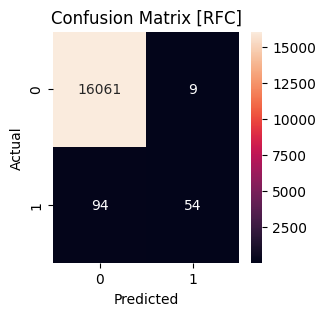

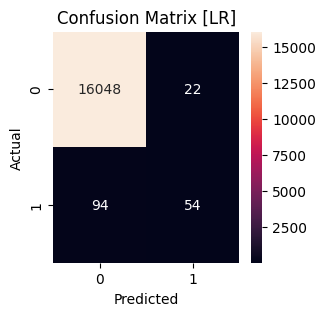

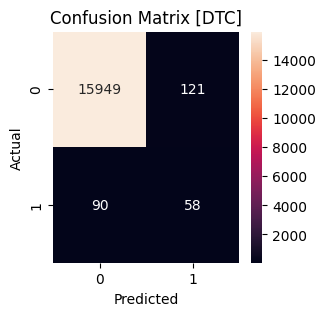

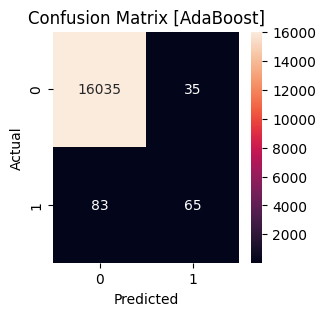

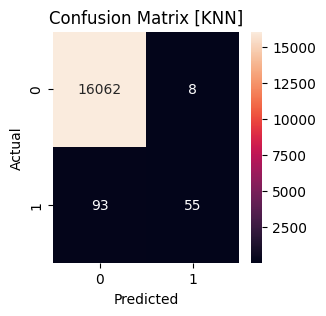

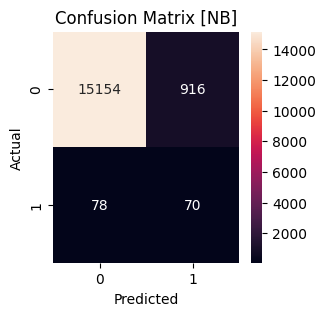

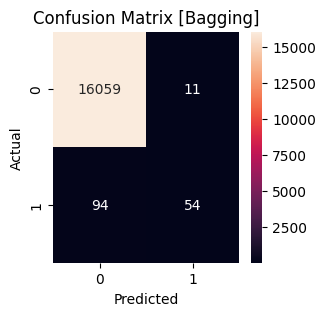

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,54,36.486486,103,69.594595
LR,54,36.486486,116,78.378378
DTC,58,39.189189,211,142.567568
AdaBoost,65,43.918919,118,79.729730
KNN,55,37.162162,101,68.243243
NB,70,47.297297,994,671.621622
Bagging,54,36.486486,105,70.945946


In [145]:
pca_cm_df, pca_anomaly_count_table = cm_anomaly_count(pca_ytest, pca_alg_dict)
display(pca_anomaly_count_table)

#### Correlation cutoff

In [146]:
pca_corr_cutoff_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
pca_alg_dict_corr_cutoff = predict(pca_corr_cutoff_models, pca_Xtrain_corr_cutoff, pca_ytrain_corr_cutoff, pca_Xtest_corr_cutoff)

Training models...



Overall Progress: 100%|██████████| 7/7 [00:43<00:00,  6.23s/it]


In [147]:
pca_metric_table_corr_cutoff = metric_table_calc(pca_ytest_corr_cutoff, pca_alg_dict_corr_cutoff)
display(pca_metric_table_corr_cutoff)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.831325,0.466216,0.597403,0.994266
LR,0.723077,0.317568,0.441315,0.992662
DTC,0.476821,0.486486,0.481605,0.990443
AdaBoost,0.767442,0.445946,0.564103,0.993711
KNN,0.819277,0.459459,0.588745,0.994142
NB,0.128631,0.628378,0.213548,0.957763
Bagging,0.802469,0.439189,0.567686,0.993896


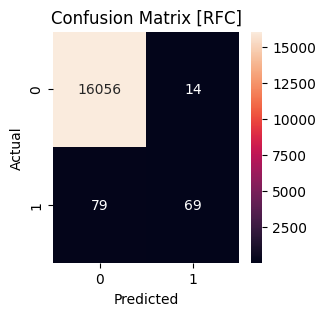

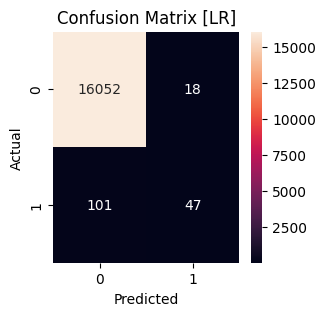

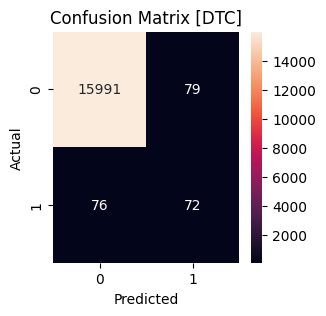

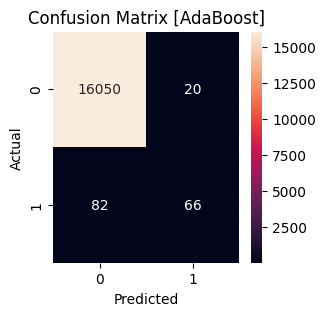

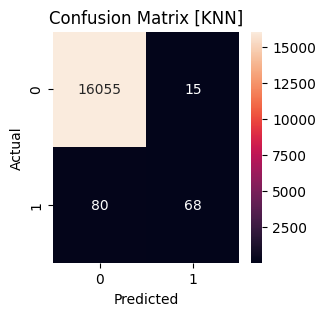

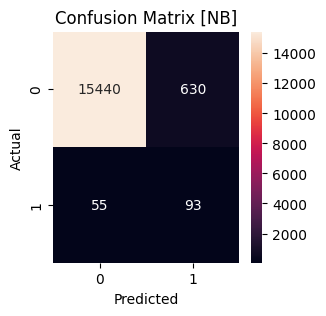

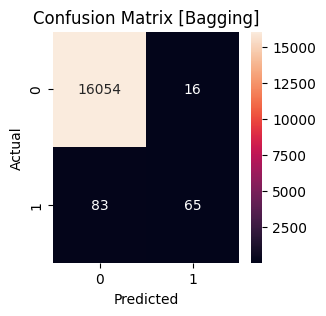

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,69,46.621622,93,62.837838
LR,47,31.756757,119,80.405405
DTC,72,48.648649,155,104.729730
AdaBoost,66,44.594595,102,68.918919
KNN,68,45.945946,95,64.189189
NB,93,62.837838,685,462.837838
Bagging,65,43.918919,99,66.891892


In [148]:
pca_cm_df_corr_cutoff, pca_anomaly_count_table_corr_cutoff = cm_anomaly_count(pca_ytest_corr_cutoff, pca_alg_dict_corr_cutoff)
display(pca_anomaly_count_table_corr_cutoff)

#### Top correlation

In [149]:
pca_top_corr_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
pca_alg_dict_top_corr = predict(pca_top_corr_models, pca_Xtrain_top_corr, pca_ytrain_top_corr, pca_Xtest_top_corr)

Training models...



Overall Progress: 100%|██████████| 7/7 [01:06<00:00,  9.47s/it]


In [150]:
pca_metric_table_top_corr = metric_table_calc(pca_ytest_top_corr, pca_alg_dict_top_corr)
display(pca_metric_table_top_corr)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.816901,0.391892,0.529680,0.993649
LR,0.718750,0.310811,0.433962,0.992601
DTC,0.448980,0.445946,0.447458,0.989949
AdaBoost,0.655172,0.385135,0.485106,0.992539
KNN,0.815789,0.418919,0.553571,0.993834
NB,0.149425,0.614865,0.240423,0.964546
Bagging,0.800000,0.405405,0.538117,0.993649


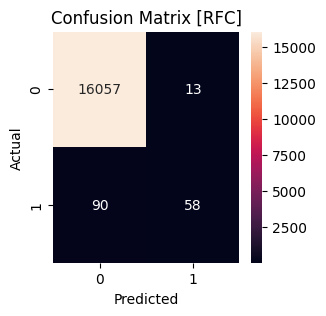

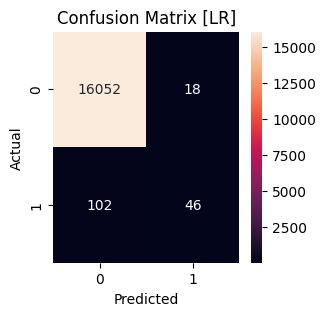

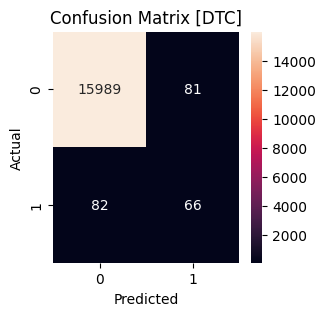

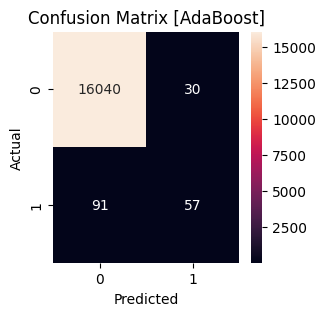

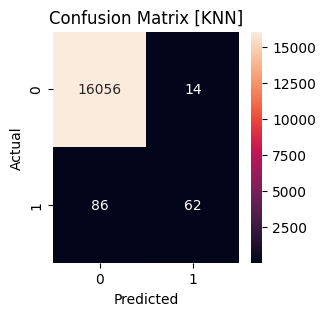

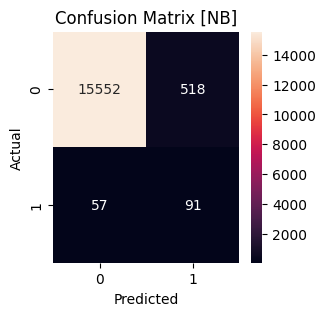

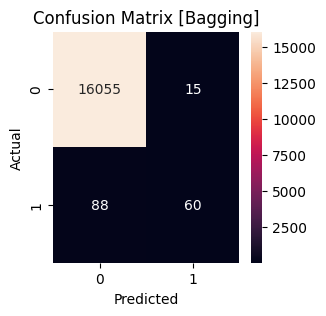

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,58,39.189189,103,69.594595
LR,46,31.081081,120,81.081081
DTC,66,44.594595,163,110.135135
AdaBoost,57,38.513514,121,81.756757
KNN,62,41.891892,100,67.567568
NB,91,61.486486,575,388.513514
Bagging,60,40.540541,103,69.594595


In [151]:
pca_cm_df_top_corr, pca_anomaly_count_table_top_corr = cm_anomaly_count(pca_ytest_top_corr, pca_alg_dict_top_corr)
display(pca_anomaly_count_table_top_corr)

### SMOTE + PCA

#### Base data

In [152]:
sm_pca_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
sm_pca_alg_dict = predict(sm_pca_models, sm_pca_Xtrain, sm_pca_ytrain, sm_pca_Xtest)

Training models...



Overall Progress: 100%|██████████| 7/7 [09:19<00:00, 79.99s/it] 


In [153]:
sm_pca_metric_table = metric_table_calc(sm_pca_ytest, sm_pca_alg_dict)
display(sm_pca_metric_table)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.004709,0.074324,0.008857,0.848193
LR,0.011376,0.682432,0.022380,0.455913
DTC,0.011887,0.324324,0.022934,0.747811
AdaBoost,0.011795,0.594595,0.023131,0.541682
KNN,0.011230,0.722973,0.022117,0.416574
NB,0.003966,0.290541,0.007825,0.327661
Bagging,0.008355,0.175676,0.015951,0.802195


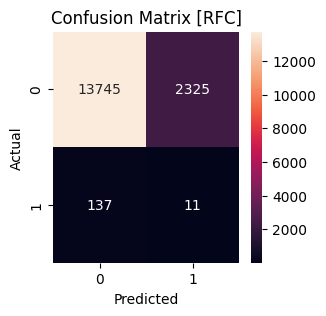

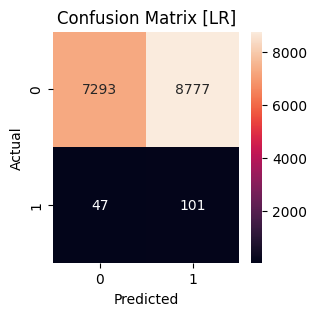

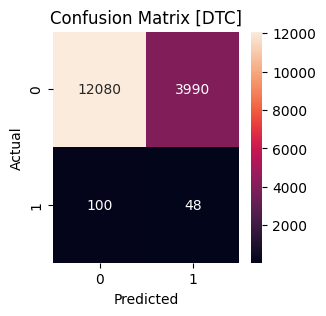

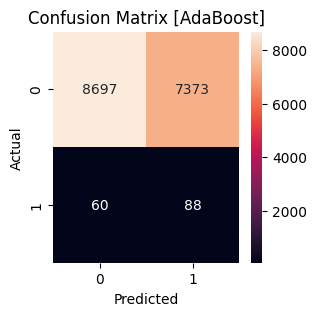

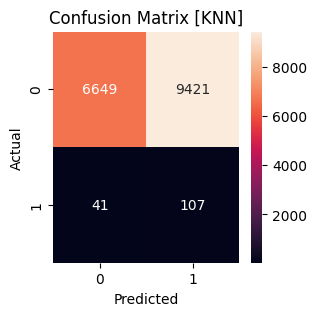

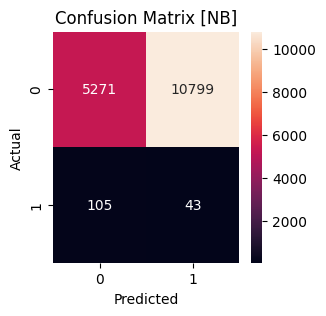

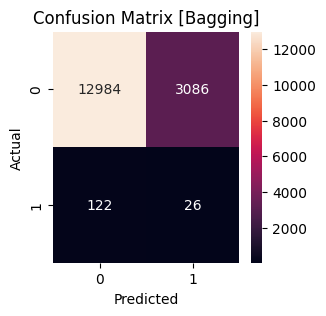

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,11,7.432432,2462,1663.513514
LR,101,68.243243,8824,5962.162162
DTC,48,32.432432,4090,2763.513514
AdaBoost,88,59.459459,7433,5022.297297
KNN,107,72.297297,9462,6393.243243
NB,43,29.054054,10904,7367.567568
Bagging,26,17.567568,3208,2167.567568


In [154]:
sm_pca_cm_df, sm_pca_anomaly_count_table = cm_anomaly_count(sm_pca_ytest, sm_pca_alg_dict)
display(sm_pca_anomaly_count_table)

#### Correlation cutoff

In [155]:
sm_pca_corr_cutoff_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
sm_pca_alg_dict_corr_cutoff = predict(sm_pca_corr_cutoff_models, sm_pca_Xtrain_corr_cutoff, sm_pca_ytrain_corr_cutoff, sm_pca_Xtest_corr_cutoff)

Training models...



Overall Progress: 100%|██████████| 7/7 [01:47<00:00, 15.34s/it]


In [156]:
sm_pca_metric_table_corr_cutoff = metric_table_calc(sm_pca_ytest_corr_cutoff, sm_pca_alg_dict_corr_cutoff)
display(sm_pca_metric_table_corr_cutoff)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.019861,0.716216,0.038651,0.674867
LR,0.014689,0.979730,0.028945,0.400111
DTC,0.015256,0.540541,0.029674,0.677395
AdaBoost,0.016147,0.871622,0.031707,0.514182
KNN,0.014412,0.871622,0.028355,0.454865
NB,0.020239,0.972973,0.039653,0.569922
Bagging,0.011029,0.425676,0.021502,0.646442


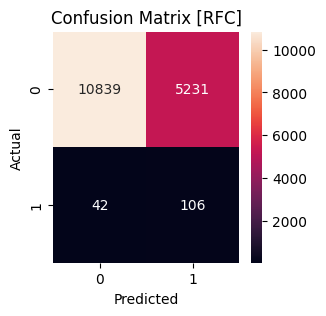

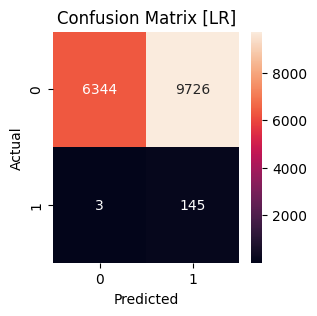

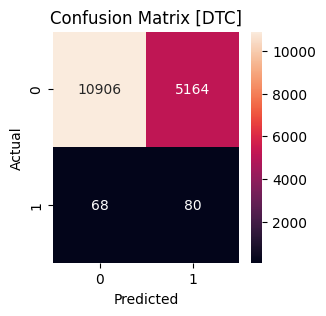

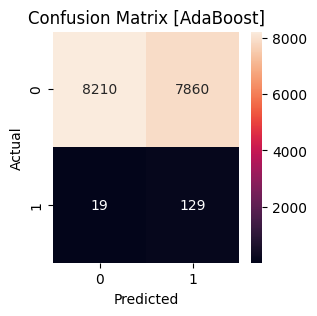

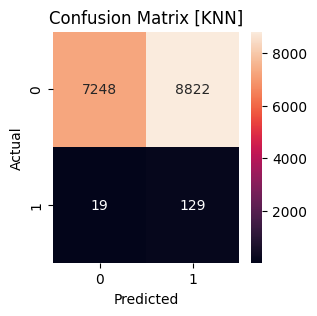

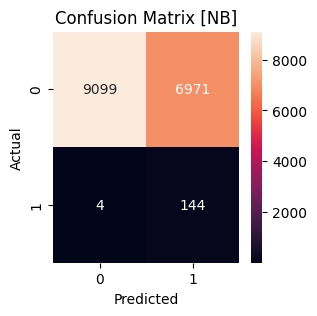

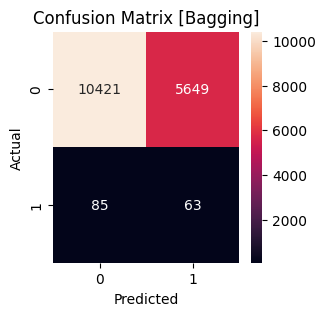

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,106,71.621622,5273,3562.837838
LR,145,97.972973,9729,6573.648649
DTC,80,54.054054,5232,3535.135135
AdaBoost,129,87.162162,7879,5323.648649
KNN,129,87.162162,8841,5973.648649
NB,144,97.297297,6975,4712.837838
Bagging,63,42.567568,5734,3874.324324


In [157]:
sm_pca_cm_df_corr_cutoff, sm_pca_anomaly_count_table_corr_cutoff = cm_anomaly_count(sm_pca_ytest_corr_cutoff, sm_pca_alg_dict_corr_cutoff)
display(sm_pca_anomaly_count_table_corr_cutoff)

#### Top correlation

In [158]:
sm_pca_top_corr_models = {
    'RFC': RandomForestClassifier(n_estimators=25, random_state=42),
    'LR': LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    'DTC': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'Bagging': BaggingClassifier(random_state=42)
}
sm_pca_alg_dict_top_corr = predict(sm_pca_top_corr_models, sm_pca_Xtrain_top_corr, sm_pca_ytrain_top_corr, sm_pca_Xtest_top_corr)

Training models...



Overall Progress: 100%|██████████| 7/7 [03:04<00:00, 26.29s/it]


In [159]:
sm_pca_metric_table_top_corr = metric_table_calc(sm_pca_ytest_top_corr, sm_pca_alg_dict_top_corr)
display(sm_pca_metric_table_top_corr)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC,0.022906,0.472973,0.043695,0.811074
LR,0.014132,0.925676,0.027840,0.410038
DTC,0.017753,0.391892,0.033968,0.796584
AdaBoost,0.017905,0.858108,0.035078,0.569182
KNN,0.014303,0.709459,0.028041,0.551178
NB,0.019765,0.817568,0.038596,0.628314
Bagging,0.020733,0.493243,0.039793,0.782772


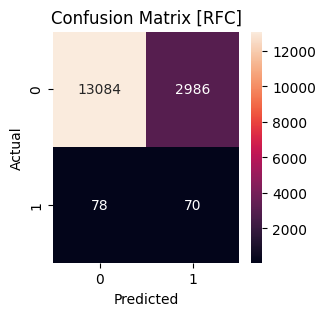

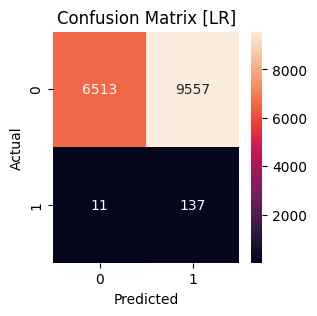

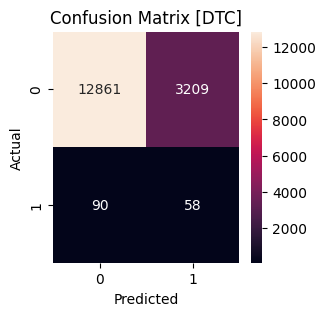

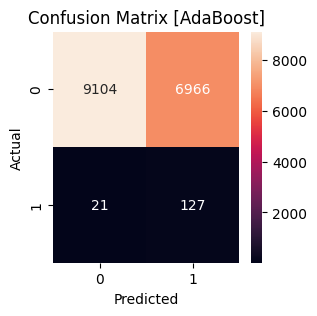

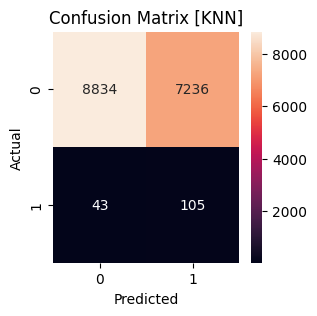

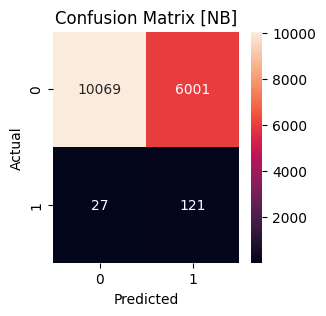

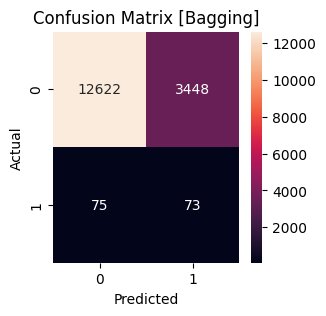

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC,70,47.297297,3064,2070.270270
LR,137,92.567568,9568,6464.864865
DTC,58,39.189189,3299,2229.054054
AdaBoost,127,85.810811,6987,4720.945946
KNN,105,70.945946,7279,4918.243243
NB,121,81.756757,6028,4072.972973
Bagging,73,49.324324,3523,2380.405405


In [160]:
sm_pca_cm_df_top_corr, sm_pca_anomaly_count_table_top_corr = cm_anomaly_count(sm_pca_ytest_top_corr, sm_pca_alg_dict_top_corr)
display(sm_pca_anomaly_count_table_top_corr)

## K-Fold Cross Validation

### Split

In [172]:
# 1. Split data into train (60%), validation (20%), and test (20%)
kf_X_temp, kf_X_test, kf_y_temp, kf_y_test = train_test_split(tr_dt.drop(columns=['target']), tr_dt['target'], test_size=0.2, random_state=42, stratify=tr_dt['target'])
kf_X_train, kf_X_val, kf_y_train, kf_y_val = train_test_split(kf_X_temp, kf_y_temp, test_size=0.25, random_state=42, stratify=kf_y_temp)  # 0.25 x 0.8 = 0.2

In [173]:
kf_y_train.value_counts(), kf_y_val.value_counts(), kf_y_test.value_counts()

(0    48210
 1      442
 Name: target, dtype: int64,
 0    16070
 1      148
 Name: target, dtype: int64,
 0    16070
 1      148
 Name: target, dtype: int64)

In [174]:
print(f"Train: {kf_X_train.shape}, Validation: {kf_X_val.shape}, Test: {kf_X_test.shape}")

Train: (48652, 156), Validation: (16218, 156), Test: (16218, 156)


### Using accuracy for tuning

#### Define Hyper-parameters that are to be tuned

In [179]:
# 2. Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3]
}

best_model = None
best_val_score = 0
best_params = None

#### Implement KFCV

In [ ]:
# 3. Grid search with CV on training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        for split in param_grid['min_samples_split']:
            cv_scores = []
            for train_idx, val_idx in tqdm(kf.split(kf_X_train), total=kf.get_n_splits(), desc="K-Fold CV"):
                X_cv_train, X_cv_val = kf_X_train.iloc[train_idx], kf_X_train.iloc[val_idx]
                y_cv_train, y_cv_val = kf_y_train.iloc[train_idx], kf_y_train.iloc[val_idx]


                clf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    random_state=42
                )
                clf.fit(X_cv_train, y_cv_train)
                preds = clf.predict(X_cv_val)
                acc = accuracy_score(y_cv_val, preds)
                cv_scores.append(acc)

            mean_cv_score = np.mean(cv_scores)

            # Evaluate on validation set
            clf = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42
            )
            clf.fit(kf_X_train, kf_y_train)
            val_preds = clf.predict(kf_X_val)
            val_score = accuracy_score(kf_y_val, val_preds)

            print(f"Params: n={n}, depth={depth}, split={split} → CV: {mean_cv_score:.3f}, VAL: {val_score:.3f}")

            if val_score > best_val_score:
                best_val_score = val_score
                best_params = (n, depth, split)
                best_model = clf

# 4. Retrain best model on train + val, test on test set
final_model = RandomForestClassifier(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
final_model.fit(kf_X_temp, kf_y_temp)
test_preds = final_model.predict(kf_X_test)
test_acc = accuracy_score(kf_y_test, test_preds)

print("\nBest Hyperparameters:", best_params)
print("Test Accuracy:", test_acc)

K-Fold CV: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it]


Params: n=10, depth=5, split=2 → CV: 0.994, VAL: 0.993


K-Fold CV: 100%|██████████| 5/5 [00:15<00:00,  3.13s/it]


Params: n=10, depth=5, split=3 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [00:31<00:00,  6.23s/it]


Params: n=10, depth=10, split=2 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [00:30<00:00,  6.06s/it]


Params: n=10, depth=10, split=3 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [01:20<00:00, 16.05s/it]


Params: n=50, depth=5, split=2 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [01:10<00:00, 14.10s/it]


Params: n=50, depth=5, split=3 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [02:05<00:00, 25.12s/it]


Params: n=50, depth=10, split=2 → CV: 0.994, VAL: 0.995


K-Fold CV: 100%|██████████| 5/5 [02:30<00:00, 30.11s/it]


Params: n=50, depth=10, split=3 → CV: 0.994, VAL: 0.995


K-Fold CV: 100%|██████████| 5/5 [02:03<00:00, 24.78s/it]


Params: n=100, depth=5, split=2 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [01:55<00:00, 23.09s/it]


Params: n=100, depth=5, split=3 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [03:08<00:00, 37.79s/it]


Params: n=100, depth=10, split=2 → CV: 0.994, VAL: 0.994


K-Fold CV: 100%|██████████| 5/5 [03:08<00:00, 37.66s/it]


Params: n=100, depth=10, split=3 → CV: 0.994, VAL: 0.995

Best Hyperparameters: (50, 10, 2)
Test Accuracy: 0.9944506104328524


c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Uncomment and use the following block if the training has to be stopped abruptly and the best found hyperparameters are to be used.

In [ ]:
# final_model = RandomForestClassifier(
#     n_estimators=best_params[0],
#     max_depth=best_params[1],
#     min_samples_split=best_params[2],
#     random_state=42
# )
# final_model.fit(np.concatenate([kf_X_train, kf_X_val]), np.concatenate([kf_y_train, kf_y_val]))
# test_preds = final_model.predict(kf_X_test)
# test_acc = accuracy_score(kf_y_test, test_preds)

# print("\nBest Hyperparameters:", best_params)
# print("Test Accuracy:", test_acc)

#### Evaluation

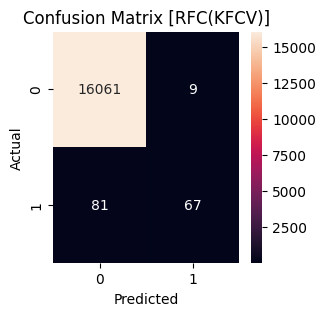

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(KFCV),67,45.27027,90,60.810811


In [184]:
cm_kf_df, kf_anomaly_count_table = cm_anomaly_count(kf_y_test, {'RFC(KFCV)':test_preds})
display(kf_anomaly_count_table)

In [185]:
metric_table_kf = metric_table_calc(kf_y_test, {'RFC(KFCV)':test_preds})
display(metric_table_kf)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(KFCV),0.881579,0.452703,0.598214,0.994451


### Using f1 score for tuning

#### Define Hyper-parameters that are to be tuned

In [186]:
# 2. Define hyperparameter grid
param_grid_f1 = {
    'n_estimators': [10, 25, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3]
}

best_model_f1 = None
best_val_score_f1 = 0
best_params_f1 = None

#### Implement KFCV

In [ ]:
# 3. Grid search with CV on training set
kf_f1 = KFold(n_splits=5, shuffle=True, random_state=42)

for n in param_grid_f1['n_estimators']:
    for depth in param_grid_f1['max_depth']:
        for split in param_grid_f1['min_samples_split']:
            cv_scores = []
            for train_idx, val_idx in tqdm(kf_f1.split(kf_X_train), total=kf_f1.get_n_splits(), desc="K-Fold CV"):
                X_cv_train, X_cv_val = kf_X_train.iloc[train_idx], kf_X_train.iloc[val_idx]
                y_cv_train, y_cv_val = kf_y_train.iloc[train_idx], kf_y_train.iloc[val_idx]


                clf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    random_state=42
                )
                clf.fit(X_cv_train, y_cv_train)
                preds = clf.predict(X_cv_val)
                fold_f1_score = f1_score(y_cv_val, preds, average='binary')
                cv_scores.append(fold_f1_score)

            mean_cv_score = np.mean(cv_scores)

            # Evaluate on validation set
            clf = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42
            )
            clf.fit(kf_X_train, kf_y_train)
            val_preds = clf.predict(kf_X_val)
            val_score = f1_score(kf_y_val, val_preds, average='binary')

            print(f"Params: n={n}, depth={depth}, split={split} → CV: {mean_cv_score:.3f}, VAL: {val_score:.3f}")

            if val_score > best_val_score_f1:
                print(f"New best found! Params: n={n}, depth={depth}, split={split}")
                # Update best parameters and model
                best_val_score_f1 = val_score
                best_params_f1 = (n, depth, split)
                best_model_f1 = clf

# 4. Retrain best model on train + val, test on test set
final_model_f1 = RandomForestClassifier(
    n_estimators=best_params_f1[0],
    max_depth=best_params_f1[1],
    min_samples_split=best_params_f1[2],
    random_state=42
)
final_model_f1.fit(kf_X_temp, kf_y_temp)
test_preds_f1 = final_model_f1.predict(kf_X_test)
test_acc_f1 = accuracy_score(kf_y_test, test_preds_f1)
test_f1_score_f1 = f1_score(kf_y_test, test_preds_f1, average='binary')

print("\nBest Hyperparameters:", best_params_f1)
print("Test Accuracy:", test_acc_f1)
print("Test F1 Score:", test_f1_score_f1)

K-Fold CV: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]


Params: n=10, depth=5, split=2 → CV: 0.507, VAL: 0.483
New best found! Params: n=10, depth=5, split=2


K-Fold CV: 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]


Params: n=10, depth=5, split=3 → CV: 0.483, VAL: 0.472


K-Fold CV: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it]


Params: n=10, depth=10, split=2 → CV: 0.550, VAL: 0.590
New best found! Params: n=10, depth=10, split=2


K-Fold CV: 100%|██████████| 5/5 [00:16<00:00,  3.26s/it]


Params: n=10, depth=10, split=3 → CV: 0.545, VAL: 0.521


K-Fold CV: 100%|██████████| 5/5 [00:27<00:00,  5.52s/it]


Params: n=25, depth=5, split=2 → CV: 0.486, VAL: 0.531


K-Fold CV: 100%|██████████| 5/5 [00:27<00:00,  5.50s/it]


Params: n=25, depth=5, split=3 → CV: 0.495, VAL: 0.531


K-Fold CV: 100%|██████████| 5/5 [00:40<00:00,  8.06s/it]


Params: n=25, depth=10, split=2 → CV: 0.569, VAL: 0.617
New best found! Params: n=25, depth=10, split=2


K-Fold CV: 100%|██████████| 5/5 [00:41<00:00,  8.28s/it]


Params: n=25, depth=10, split=3 → CV: 0.555, VAL: 0.596


K-Fold CV: 100%|██████████| 5/5 [00:48<00:00,  9.74s/it]


Params: n=50, depth=5, split=2 → CV: 0.481, VAL: 0.524


K-Fold CV: 100%|██████████| 5/5 [00:52<00:00, 10.58s/it]


Params: n=50, depth=5, split=3 → CV: 0.475, VAL: 0.527


K-Fold CV: 100%|██████████| 5/5 [01:27<00:00, 17.45s/it]


Params: n=50, depth=10, split=2 → CV: 0.570, VAL: 0.614


K-Fold CV: 100%|██████████| 5/5 [01:40<00:00, 20.02s/it]


Params: n=50, depth=10, split=3 → CV: 0.566, VAL: 0.601

Best Hyperparameters: (25, 10, 2)
Test Accuracy: 0.9942656307806141
Test F1 Score: 0.5829596412556053


c:\Users\amoya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Evaluation

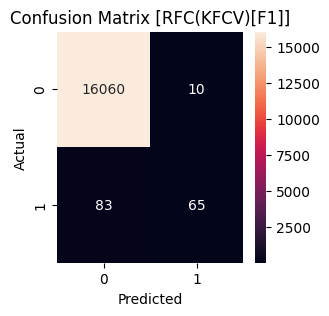

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(KFCV)[F1],65,43.918919,93,62.837838


In [189]:
cm_kf_df_f1, kf_anomaly_count_table_f1 = cm_anomaly_count(kf_y_test, {'RFC(KFCV)[F1]':test_preds_f1})
display(kf_anomaly_count_table_f1)

In [190]:
metric_table_kf_f1 = metric_table_calc(kf_y_test, {'RFC(KFCV)[F1]':test_preds_f1})
display(metric_table_kf_f1)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(KFCV)[F1],0.866667,0.439189,0.58296,0.994266


### Using recall for tuning

#### Define Hyper-parameters that are to be tuned

In [192]:
# 2. Define hyperparameter grid
param_grid_r = {
    'n_estimators': [20, 25, 30],
    'max_depth': [5, 8],
    'min_samples_split': [2, 3]
}

best_model_r = None
best_val_score_r = 0
best_params_r = None

#### Implement KFCV

In [ ]:
kf_r = KFold(n_splits=5, shuffle=True, random_state=42)

for n in param_grid_r['n_estimators']:
    for depth in param_grid_r['max_depth']:
        for split in param_grid_r['min_samples_split']:
            cv_scores = []
            for train_idx, val_idx in tqdm(kf_r.split(kf_X_train), total=kf_r.get_n_splits(), desc="K-Fold CV"):
                X_cv_train, X_cv_val = kf_X_train.iloc[train_idx], kf_X_train.iloc[val_idx]
                y_cv_train, y_cv_val = kf_y_train.iloc[train_idx], kf_y_train.iloc[val_idx]


                clf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    random_state=42
                )
                clf.fit(X_cv_train, y_cv_train)
                preds = clf.predict(X_cv_val)
                fold_recall = recall_score(y_cv_val, preds, average='binary')
                cv_scores.append(fold_recall)

            mean_cv_score = np.mean(cv_scores)

            # Evaluate on validation set
            clf = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42
            )
            clf.fit(kf_X_train, kf_y_train)
            val_preds = clf.predict(kf_X_val)
            val_score = recall_score(kf_y_val, val_preds, average='binary')

            print(f"Params: n={n}, depth={depth}, split={split} → CV: {mean_cv_score:.3f}, VAL: {val_score:.3f}")

            if val_score > best_val_score_r:
                print(f"New best found! Params: n={n}, depth={depth}, split={split}")
                # Update best parameters and model
                best_val_score_r = val_score
                best_params_r = (n, depth, split)
                best_model_r = clf

# 4. Retrain best model on train + val, test on test set
final_model_r = RandomForestClassifier(
    n_estimators=best_params_r[0],
    max_depth=best_params_r[1],
    min_samples_split=best_params_r[2],
    random_state=42
)
final_model_r.fit(kf_X_temp, kf_y_temp)
test_preds_r = final_model_r.predict(kf_X_test)
test_acc_r = accuracy_score(kf_y_test, test_preds_r)
test_recall_score_r = recall_score(kf_y_test, test_preds_r, average='binary')

print("\nBest Hyperparameters:", best_params_r)
print("Test Accuracy:", test_acc_r)
print("Test Recall Score:", test_recall_score_r)

K-Fold CV: 100%|██████████| 5/5 [00:25<00:00,  5.18s/it]


Params: n=20, depth=5, split=2 → CV: 0.334, VAL: 0.358
New best found! Params: n=20, depth=5, split=2


K-Fold CV: 100%|██████████| 5/5 [00:23<00:00,  4.77s/it]


Params: n=20, depth=5, split=3 → CV: 0.342, VAL: 0.365
New best found! Params: n=20, depth=5, split=3


K-Fold CV: 100%|██████████| 5/5 [00:28<00:00,  5.78s/it]


Params: n=20, depth=8, split=2 → CV: 0.406, VAL: 0.426
New best found! Params: n=20, depth=8, split=2


K-Fold CV: 100%|██████████| 5/5 [00:27<00:00,  5.53s/it]


Params: n=20, depth=8, split=3 → CV: 0.405, VAL: 0.439
New best found! Params: n=20, depth=8, split=3


K-Fold CV: 100%|██████████| 5/5 [00:23<00:00,  4.76s/it]


Params: n=25, depth=5, split=2 → CV: 0.334, VAL: 0.378


K-Fold CV: 100%|██████████| 5/5 [00:23<00:00,  4.72s/it]


Params: n=25, depth=5, split=3 → CV: 0.343, VAL: 0.378


K-Fold CV: 100%|██████████| 5/5 [00:39<00:00,  7.85s/it]


Params: n=25, depth=8, split=2 → CV: 0.401, VAL: 0.426


K-Fold CV: 100%|██████████| 5/5 [00:38<00:00,  7.64s/it]


Params: n=25, depth=8, split=3 → CV: 0.396, VAL: 0.459
New best found! Params: n=25, depth=8, split=3


K-Fold CV: 100%|██████████| 5/5 [00:35<00:00,  7.06s/it]


Params: n=30, depth=5, split=2 → CV: 0.356, VAL: 0.378


K-Fold CV: 100%|██████████| 5/5 [00:36<00:00,  7.33s/it]


Params: n=30, depth=5, split=3 → CV: 0.358, VAL: 0.399


K-Fold CV: 100%|██████████| 5/5 [00:50<00:00, 10.08s/it]


Params: n=30, depth=8, split=2 → CV: 0.406, VAL: 0.426


K-Fold CV: 100%|██████████| 5/5 [00:53<00:00, 10.70s/it]


Params: n=30, depth=8, split=3 → CV: 0.402, VAL: 0.459

Best Hyperparameters: (25, 8, 3)
Test Accuracy: 0.9942039708965347
Test Recall Score: 0.43243243243243246


#### Evaluation

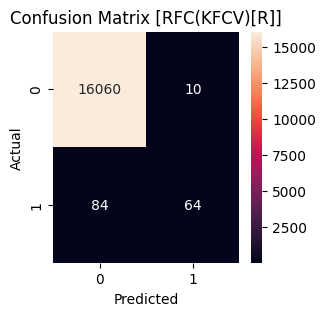

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(KFCV)[R],64,43.243243,94,63.513514


In [194]:
cm_kf_df_r, kf_anomaly_count_table_r = cm_anomaly_count(kf_y_test, {'RFC(KFCV)[R]':test_preds_r})
display(kf_anomaly_count_table_r)

In [ ]:
metric_table_kf_r = metric_table_calc(kf_y_test, {'RFC(KFCV)[R]':test_preds_r})
display(metric_table_kf_r)

,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
"RFC(KFCV)[R](25, 8, 3)",0.864865,0.432432,0.576577,0.994204


### Best runs

#### Function

In [208]:
def kfold_acc_selector(data, param_grid, n_splits=5, random_state=42):
    """
    Function to perform K-Fold cross-validation and select the best model based on accuracy.
    Args:
        data (DataFrame): Input data with features and target variable.
        param_grid (dict): Dictionary of hyperparameters to search.
        n_splits (int): Number of K-Folds
        random_state (int): Random seed for reproducibility.
    Returns:
        best_model (RandomForestClassifier): Best model after hyperparameter tuning.
        test_preds (array): Predictions on the test set.
    """

    kf_X_temp, kf_X_test, kf_y_temp, kf_y_test = train_test_split(data.drop(columns=['target']), data['target'], test_size=0.2, random_state=42, stratify=data['target'])
    kf_X_train, kf_X_val, kf_y_train, kf_y_val = train_test_split(kf_X_temp, kf_y_temp, test_size=0.25, random_state=42, stratify=kf_y_temp)  # 0.25 x 0.8 = 0.2
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    best_model = None
    best_val_score = 0
    best_params = None

    for n in param_grid['n_estimators']:
        for depth in param_grid['max_depth']:
            for split in param_grid['min_samples_split']:
                cv_scores = []
                for train_idx, val_idx in tqdm(kf.split(kf_X_train), total=kf.get_n_splits(), desc="K-Fold CV", leave=False):
                    X_cv_train, X_cv_val = kf_X_train.iloc[train_idx], kf_X_train.iloc[val_idx]
                    y_cv_train, y_cv_val = kf_y_train.iloc[train_idx], kf_y_train.iloc[val_idx]


                    clf = RandomForestClassifier(
                        n_estimators=n,
                        max_depth=depth,
                        min_samples_split=split,
                        random_state=42
                    )
                    clf.fit(X_cv_train, y_cv_train)
                    preds = clf.predict(X_cv_val)
                    acc = accuracy_score(y_cv_val, preds)
                    cv_scores.append(acc)

                mean_cv_score = np.mean(cv_scores)

                # Evaluate on validation set
                clf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    random_state=42
                )
                clf.fit(kf_X_train, kf_y_train)
                val_preds = clf.predict(kf_X_val)
                val_score = accuracy_score(kf_y_val, val_preds)

                print(f"Params: n={n}, depth={depth}, split={split} → CV: {mean_cv_score:.3f}, VAL: {val_score:.3f}")

                if val_score > best_val_score:
                    best_val_score = val_score
                    best_params = (n, depth, split)
                    best_model = clf

    # 4. Retrain best model on train + val, test on test set
    final_model = RandomForestClassifier(
        n_estimators=best_params[0],
        max_depth=best_params[1],
        min_samples_split=best_params[2],
        random_state=42
    )
    final_model.fit(kf_X_temp, kf_y_temp)
    test_preds = final_model.predict(kf_X_test)
    test_acc = accuracy_score(kf_y_test, test_preds)

    print("\nBest Hyperparameters:", best_params)
    print("Test Accuracy:", test_acc)
    display(cm_anomaly_count(kf_y_test, {'RFC(KFCV)':test_preds})[1])
    display(metric_table_calc(kf_y_test, {'RFC(KFCV)':test_preds}))
    return final_model, test_preds

#### Runs

Params: n=20, depth=5, split=2 → CV: 0.994, VAL: 0.994


Params: n=20, depth=5, split=3 → CV: 0.994, VAL: 0.994


Params: n=20, depth=8, split=2 → CV: 0.994, VAL: 0.994


Params: n=20, depth=8, split=3 → CV: 0.994, VAL: 0.994


Params: n=20, depth=10, split=2 → CV: 0.994, VAL: 0.994


Params: n=20, depth=10, split=3 → CV: 0.994, VAL: 0.995


Params: n=50, depth=5, split=2 → CV: 0.994, VAL: 0.994


Params: n=50, depth=5, split=3 → CV: 0.994, VAL: 0.994


Params: n=50, depth=8, split=2 → CV: 0.994, VAL: 0.994


Params: n=50, depth=8, split=3 → CV: 0.994, VAL: 0.995


Params: n=50, depth=10, split=2 → CV: 0.994, VAL: 0.995


Params: n=50, depth=10, split=3 → CV: 0.994, VAL: 0.995

Best Hyperparameters: (50, 10, 2)
Test Accuracy: 0.994388950548773


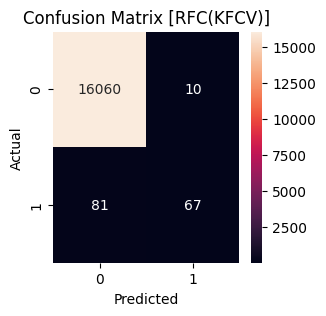

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(KFCV),67,45.27027,91,61.486486


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(KFCV),0.87013,0.452703,0.595556,0.994389


In [209]:
param_grid_0 = {
    'n_estimators': [20,50],
    'max_depth': [5,8,10],
    'min_samples_split': [2,3]
}
best_model_0, test_preds_0 = kfold_acc_selector(tr_dt, param_grid_0)

Params: n=45, depth=9, split=2 → CV: 0.995, VAL: 0.995


Params: n=45, depth=9, split=3 → CV: 0.995, VAL: 0.995


Params: n=45, depth=10, split=2 → CV: 0.995, VAL: 0.995


Params: n=45, depth=10, split=3 → CV: 0.995, VAL: 0.995


Params: n=45, depth=11, split=2 → CV: 0.995, VAL: 0.995


Params: n=45, depth=11, split=3 → CV: 0.995, VAL: 0.995


Params: n=50, depth=9, split=2 → CV: 0.995, VAL: 0.995


Params: n=50, depth=9, split=3 → CV: 0.995, VAL: 0.995


Params: n=50, depth=10, split=2 → CV: 0.995, VAL: 0.995


Params: n=50, depth=10, split=3 → CV: 0.995, VAL: 0.995


Params: n=50, depth=11, split=2 → CV: 0.995, VAL: 0.995


Params: n=50, depth=11, split=3 → CV: 0.995, VAL: 0.995


Params: n=55, depth=9, split=2 → CV: 0.995, VAL: 0.995


Params: n=55, depth=9, split=3 → CV: 0.995, VAL: 0.995


Params: n=55, depth=10, split=2 → CV: 0.995, VAL: 0.995


Params: n=55, depth=10, split=3 → CV: 0.995, VAL: 0.995


Params: n=55, depth=11, split=2 → CV: 0.995, VAL: 0.995


Params: n=55, depth=11, split=3 → CV: 0.995, VAL: 0.995

Best Hyperparameters: (55, 11, 2)
Test Accuracy: 0.9946972499691701


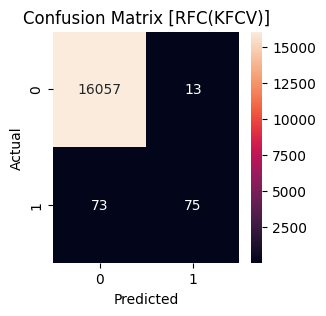

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(KFCV),75,50.675676,86,58.108108


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(KFCV),0.852273,0.506757,0.635593,0.994697


In [210]:
param_grid_1 = {
    'n_estimators': [45,50,55],
    'max_depth': [9,10,11],
    'min_samples_split': [2,3]
}
best_model_1, test_preds_1 = kfold_acc_selector(corr_cutoff_df, param_grid_1)

Params: n=45, depth=9, split=2 → CV: 0.995, VAL: 0.995


Params: n=45, depth=9, split=3 → CV: 0.995, VAL: 0.995


Params: n=45, depth=10, split=2 → CV: 0.995, VAL: 0.995


Params: n=45, depth=10, split=3 → CV: 0.995, VAL: 0.995


Params: n=45, depth=11, split=2 → CV: 0.995, VAL: 0.995


Params: n=45, depth=11, split=3 → CV: 0.995, VAL: 0.995


Params: n=50, depth=9, split=2 → CV: 0.995, VAL: 0.995


Params: n=50, depth=9, split=3 → CV: 0.995, VAL: 0.995


Params: n=50, depth=10, split=2 → CV: 0.995, VAL: 0.995


Params: n=50, depth=10, split=3 → CV: 0.995, VAL: 0.995


Params: n=50, depth=11, split=2 → CV: 0.995, VAL: 0.995


Params: n=50, depth=11, split=3 → CV: 0.995, VAL: 0.995


Params: n=55, depth=9, split=2 → CV: 0.995, VAL: 0.995


Params: n=55, depth=9, split=3 → CV: 0.995, VAL: 0.995


Params: n=55, depth=10, split=2 → CV: 0.995, VAL: 0.995


Params: n=55, depth=10, split=3 → CV: 0.995, VAL: 0.995


Params: n=55, depth=11, split=2 → CV: 0.995, VAL: 0.995


Params: n=55, depth=11, split=3 → CV: 0.995, VAL: 0.995

Best Hyperparameters: (50, 9, 2)
Test Accuracy: 0.9946972499691701


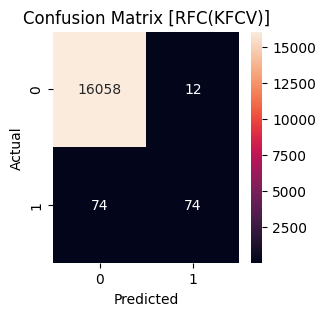

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
RFC(KFCV),74,50.0,86,58.108108


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
RFC(KFCV),0.860465,0.5,0.632479,0.994697


In [211]:
param_grid_2 = {
    'n_estimators': [45,50,55],
    'max_depth': [9,10,11],
    'min_samples_split': [2,3]
}
best_model_2, test_preds_2 = kfold_acc_selector(top_corr_df, param_grid_2)

## SMOTE + KFCV

## Deep Learning Model

### Base data

In [249]:
# 1. Split data into train (60%), validation (20%), and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(tr_dt.drop(columns=['target']), tr_dt['target'], test_size=0.2, random_state=42, stratify=tr_dt['target'])
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 x 0.8 = 0.2
y_train = y_train.to_numpy() if hasattr(y_train, "to_numpy") else np.array(y_train)
# Convert to array and enforce dtype
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

# 5. Train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    class_weight=class_weights_dict  # Adjust class weights to handle imbalance
)

# 6. Evaluate the model
test_loss, test_acc, test_recall, test_precision = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.3f}, Recall: {test_recall:.3f}, Precision: {test_precision:.3f}")

# 7. Detailed classification report
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.3).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=5, zero_division=0))

Epoch 1/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9883 - loss: nan - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: nan - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: nan - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 4/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: nan - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 5/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy

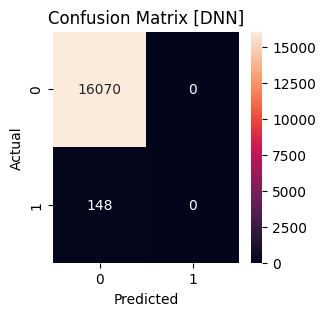

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
DNN,0,0.0,148,100.0


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
DNN,0.0,0.0,0.0,0.990874


In [251]:
metric_table_dnn = metric_table_calc(pd.Series(y_test), {'DNN':pd.Series(y_pred.flatten())})
cm_df_dnn, anomaly_count_table_dnn = cm_anomaly_count(pd.Series(y_test), {'DNN':pd.Series(y_pred.flatten())})
display(anomaly_count_table_dnn)
display(metric_table_dnn)

### Correlation cutoff

Epoch 1/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: nan - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 2/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: nan - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 3/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: nan - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 4/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: nan - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_accuracy: 0.9909 - val_loss: nan - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 5/25
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy

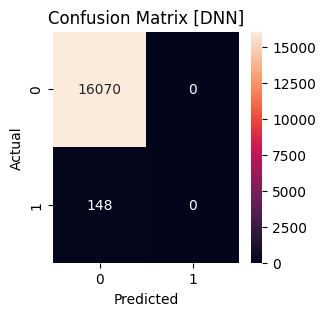

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
DNN,0,0.0,148,100.0


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
DNN,0.0,0.0,0.0,0.990874


In [255]:
# 1. Split data into train (60%), validation (20%), and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(corr_cutoff_df.drop(columns=['target']), corr_cutoff_df['target'], test_size=0.2, random_state=42, stratify=corr_cutoff_df['target'])
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 x 0.8 = 0.2
y_train = y_train.to_numpy() if hasattr(y_train, "to_numpy") else np.array(y_train)
# Convert to array and enforce dtype
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)

# 5. Train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    class_weight={0: 0.1, 1: 1e10}  # Adjust class weights to handle imbalance
)

# 6. Evaluate the model
test_loss, test_acc, test_recall, test_precision = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.3f}, Recall: {test_recall:.3f}, Precision: {test_precision:.3f}")

# 7. Detailed classification report
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.1).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=5, zero_division=0))
metric_table_dnn = metric_table_calc(pd.Series(y_test), {'DNN':pd.Series(y_pred.flatten())})
cm_df_dnn, anomaly_count_table_dnn = cm_anomaly_count(pd.Series(y_test), {'DNN':pd.Series(y_pred.flatten())})
display(anomaly_count_table_dnn)
display(metric_table_dnn)

## Balanced RFC

### Base data

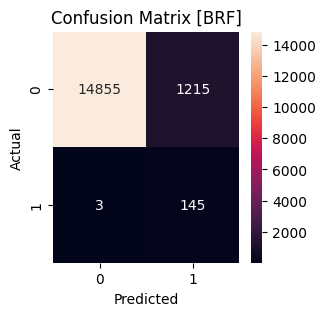

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,145,97.972973,1218,822.972973


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.106618,0.97973,0.192308,0.924898


In [258]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(tr_dt.drop(columns=['target']), tr_dt['target'], test_size=0.2, random_state=42, stratify=tr_dt['target'])
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
display(cm_anomaly_count(y_test, {'BRF':y_pred})[1])
display(metric_table_calc(y_test, {'BRF':y_pred}))


### Correlation cutoff

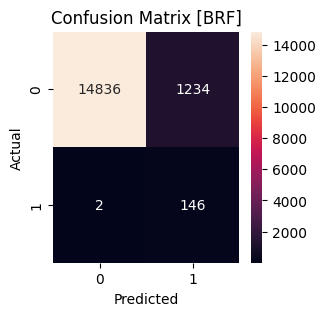

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,146,98.648649,1236,835.135135


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.105797,0.986486,0.191099,0.923788


In [259]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(corr_cutoff_df.drop(columns=['target']), corr_cutoff_df['target'], test_size=0.2, random_state=42, stratify=corr_cutoff_df['target'])
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
display(cm_anomaly_count(y_test, {'BRF':y_pred})[1])
display(metric_table_calc(y_test, {'BRF':y_pred}))

### Top correlation

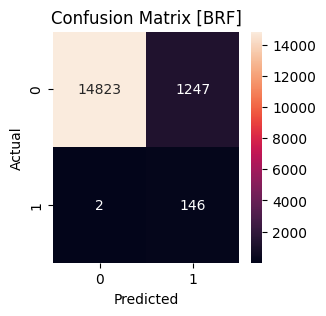

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,146,98.648649,1249,843.918919


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.10481,0.986486,0.189487,0.922987


In [260]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(top_corr_df.drop(columns=['target']), top_corr_df['target'], test_size=0.2, random_state=42, stratify=top_corr_df['target'])
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
display(cm_anomaly_count(y_test, {'BRF':y_pred})[1])
display(metric_table_calc(y_test, {'BRF':y_pred}))

### KFCV

#### Base data

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Recall Score: 0.9898305084745763


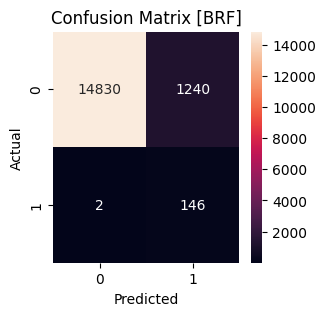

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,146,98.648649,1242,839.189189


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.105339,0.986486,0.190352,0.923418


In [262]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

brf = BalancedRandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(tr_dt.drop(columns=['target']), tr_dt['target'], test_size=0.2, random_state=42, stratify=tr_dt['target'])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(brf, param_grid, cv=cv, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
display(cm_anomaly_count(y_test, {'BRF':y_pred})[1])
display(metric_table_calc(y_test, {'BRF':y_pred}))

#### Correlation cutoff

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score: 0.9932203389830508


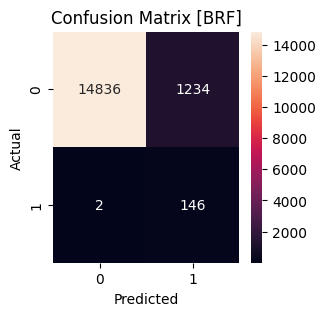

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,146,98.648649,1236,835.135135


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.105797,0.986486,0.191099,0.923788


In [279]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

brf = BalancedRandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(corr_cutoff_df.drop(columns=['target']), corr_cutoff_df['target'], test_size=0.2, random_state=42, stratify=corr_cutoff_df['target'])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(brf, param_grid, cv=cv, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
display(cm_anomaly_count(y_test, {'BRF':y_pred})[1])
display(metric_table_calc(y_test, {'BRF':y_pred}))

In [280]:
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'Models//highest_recall_model.pkl')

['Models//highest_recall_model.pkl']

##### Post-processing

In [362]:
X_cutoff_top_corr = X_test[X_test['sep_AU']>10000]

In [363]:
X_cutoff_top_corr.head()

,pmra_error1,pmra_error2,pmdec_error1,pmdec_error2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_params_solved2,nu_eff_used_in_astrometry2,pseudocolour2,pseudocolour_error2,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_mean_mag1,phot_rp_mean_mag2,pairdistance,sep_AU,R_chance_align
877026,0.017469,0.084082,0.020783,0.094440,0.000000,0.385585,95,1.000000e+20,1.198063e+00,2.138166e-02,1.323400e-01,-4.762116e-02,0.031347,0.143088,0.005326,0.017059,747.910828,14.634405,17.754389,15.731030,19.496805,13.586113,16.483549,0.032010,21431.844435,0.000168
909633,0.009695,0.011626,0.013492,0.013673,0.072772,0.102459,31,1.545153e+00,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0.018800,0.019022,0.007459,0.013351,4737.541504,9.328661,10.118770,9.606764,10.468513,8.885833,9.607478,0.100678,41006.329472,0.030783
615180,0.024365,0.026667,0.020752,0.022180,0.042763,0.000000,31,1.302542e+00,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0.036473,0.039982,0.006392,0.031219,2127.896729,14.137839,14.261100,15.281376,15.511254,13.073855,13.154173,0.039023,13270.246799,0.000425
1220454,0.032364,0.204341,0.044840,0.325017,0.039065,0.962400,95,1.000000e+20,1.120174e+00,5.247910e-02,-1.321240e-01,-1.822242e-01,0.062636,0.454668,0.018876,0.009468,434.071503,16.661110,19.536045,18.326027,21.500132,15.417244,18.132372,0.058347,38954.514319,0.429177
1503609,0.055382,0.078663,0.046719,0.066950,0.095512,0.069116,31,1.262255e+00,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0.084193,0.117842,0.012141,0.009520,1159.091675,16.628668,17.336575,18.002424,18.874788,15.476084,16.137907,0.028499,19368.788103,0.000405


In [364]:
y_cutoff_top_corr = y_test[X_cutoff_top_corr.index]

In [365]:
# Suppose the original index is from X or y_true
y_pred_series = pd.Series(y_pred, index=X_test.index)  # replace X.index with the correct one

# Now you can safely do:
y_pred_cutoff_top_corr = y_pred_series.loc[y_cutoff_top_corr.index]

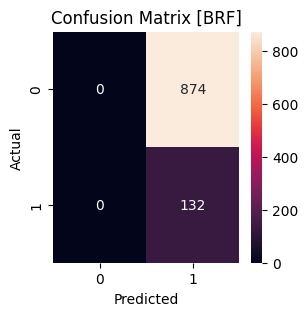

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,132,100.0,874,662.121212


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.131213,1.0,0.231986,0.131213


In [366]:
display(cm_anomaly_count(y_cutoff_top_corr, {'BRF':y_pred_cutoff_top_corr})[1])
display(metric_table_calc(y_cutoff_top_corr, {'BRF':y_pred_cutoff_top_corr}))

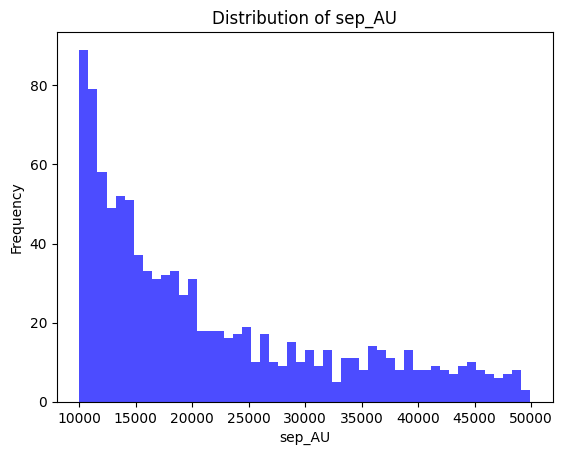

In [368]:
plt.hist(X_cutoff_top_corr['sep_AU'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of sep_AU')
plt.xlabel('sep_AU')
plt.ylabel('Frequency')
plt.show()

#### Top correlation

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Recall Score: 0.9932203389830508


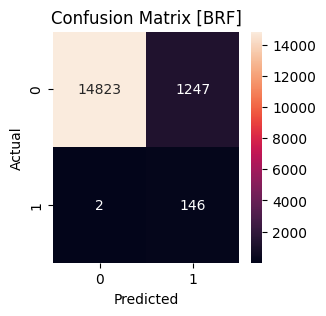

,True positives,True positive rate (%),Misclassification count,Misclassification rate (%)
Algorithms,,,,
BRF,146,98.648649,1249,843.918919


,Precision,Recall,F1 score,Accuracy
Algorithms,,,,
BRF,0.10481,0.986486,0.189487,0.922987


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

brf = BalancedRandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(top_corr_df.drop(columns=['target']), top_corr_df['target'], test_size=0.2, random_state=42, stratify=top_corr_df['target'])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(brf, param_grid, cv=cv, scoring='recall', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
display(cm_anomaly_count(y_test, {'BRF':y_pred})[1])
display(metric_table_calc(y_test, {'BRF':y_pred}))

## Save Best models

### Most accurate models

Correlation cutoff

In [285]:
with open('Models//most_accurate_models.pkl', 'wb') as f:
    pickle.dump(corr_cutoff_models, f)

### Highest recall model

Balanced RFC KFCV (Corr cutoff)

In [ ]:
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'Models//highest_recall_model.pkl')

# Al-Badry anomaly predictions

## Import best models

In [287]:
accurate_models = joblib.load('Models//most_accurate_models.pkl')
highest_recall_model = joblib.load('Models//highest_recall_model.pkl')

In [288]:
accurate_model = accurate_models['RFC']

In [293]:
df.shape

(1817594, 217)

In [294]:
# Use only the columns the model expects
X_raw_filtered_acc = df[accurate_model.feature_names_in_]
preds_acc = accurate_model.predict(X_raw_filtered_acc)

X_raw_filtered_hr = df[highest_recall_model.feature_names_in_]
preds_hr = highest_recall_model.predict(X_raw_filtered_hr)

In [298]:
preds_acc.sum(), preds_hr.sum()

(318995, 637250)

In [299]:
pred_dev_acc = df[preds_acc == 1]
pred_dev_hr = df[preds_hr == 1]

In [301]:
pred_dev_acc.head()

,solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,ipd_gof_harmonic_amplitude1,ipd_gof_harmonic_amplitude2,ipd_gof_harmonic_phase1,ipd_gof_harmonic_phase2,ipd_frac_multi_peak1,ipd_frac_multi_peak2,ipd_frac_odd_win1,ipd_frac_odd_win2,ruwe1,ruwe2,scan_direction_strength_k11,scan_direction_strength_k12,scan_direction_strength_k21,scan_direction_strength_k22,scan_direction_strength_k31,scan_direction_strength_k32,scan_direction_strength_k41,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_source_id1,dr2_source_id2,dr2_parallax1,dr2_parallax2,dr2_parallax_error1,dr2_parallax_error2,dr2_pmra1,dr2_pmra2,dr2_pmdec1,dr2_pmdec2,dr2_pmra_error1,dr

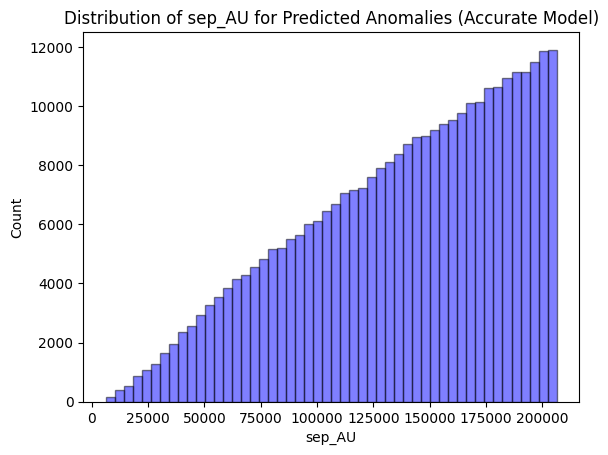

In [306]:
plt.hist(pred_dev_acc['sep_AU'], bins=50, alpha=0.5, label='Accurate Model', color='blue', edgecolor='black')
plt.xlabel('sep_AU')
plt.ylabel('Count')
plt.title('Distribution of sep_AU for Predicted Anomalies (Accurate Model)')
plt.show()

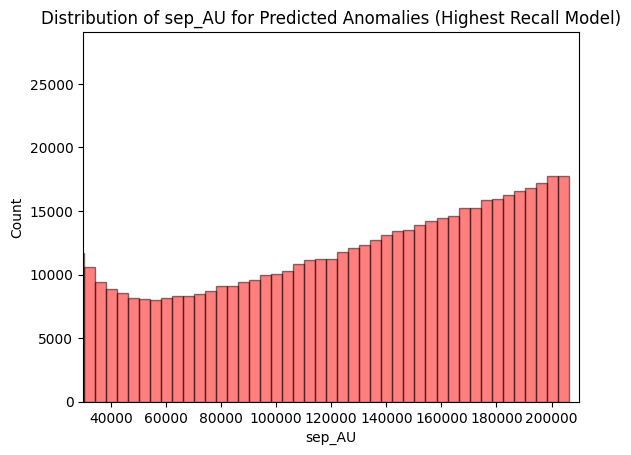

In [319]:
plt.hist(pred_dev_hr['sep_AU'], bins=50, alpha=0.5, label='Highest Recall Model', color='red', edgecolor='black')
plt.xlim([30000, 210000])
plt.xlabel('sep_AU')
plt.ylabel('Count')
plt.title('Distribution of sep_AU for Predicted Anomalies (Highest Recall Model)')
plt.show()

# RAW GAIA source mapping